# Statistical Analysis for Research Paper - Exploring the Impact of MiR-92a-3p on FOLFOX Chemoresistance Biomarker Genes in Colon Cancer Cell Lines.

Original manuscript submitted in Front. Pharmacol. - Pharmacogenetics and Pharmacogenomics. 
Issue: Editor's Feature: Negative Findings in Pharmacogenetics and Pharmacogenomics Volume II

This research aims to investigate the potential role of miR-92a-3p, as a pharmacoepigenetic factor, in the development of chemoresistance in colon cancer tumor cells. Specifically, we explore how miR-92a-3p may influence the expression of genes that are indicative of the response to 5-fluorouracil/oxaliplatin-based chemotherapy in clinical settings. Our proposed novel mechanism suggests that miR-92a-3p may activate the Wnt/β‐catenin signaling pathway and the EMT program in tumor cells, subsequently leading to increased expression of DPYD, TYMS, MTHFR, ERCC1, ERCC2, and XRCC1. However, our findings indicate that miR-92a-3p, does not alter the expression of these biomarkers associated with FOLFOX chemotherapy in colon cancer cell lines.


In [3]:
# Data treatment and Processing
import numpy as np
import pandas as pd

# Data visualization and graphs
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.legend_handler import HandlerTuple
%matplotlib inline
plt.style.use('ggplot')

# Pandas visualization options
pd.set_option('display.max_columns',None)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")




## Functions to define for Data analysis

Functions to define for EDA:
- Normality (Q-Q Plot and Shapiro-Wilk tests)
- Levene Test
- Power Tests

Functions to define for Statistical Analysis:
- Student T test (Parametric)
- ANOVA (Parametric)
- Kruskal Wallis H-Test (Non-Parametric)

### Variable names and characteristics:

1. **Cell line**: Name of the corresponding transfected cell line. Values 'SW480' and 'SW620' (from SW480 (ATCC® CCL-228TM) and SW620(ATCC® CCL-227TM) cell lines) 

2. **Test**: Defines if the results correspond to mRNA obtained from cells transfected with test (miR-92a-3p mimic/inhibitor) or mirVana™ mimic/control negative control oligonucleotide . Binary values: 1= Test, 0=Control.

3. **Transfection Type**: Defines if the results correspond to transfection with  miR-92a-3p-mimic = 'Mimic', or miR-92a-3p-inhibitor = 'Inhibitor'.

4. **miR-92a-3p**: float indicating miR-92a-3p relative expression/levels, obtained by RT-qPCR.

5. **SNAIL**: float indicating SNAIL relative mRNA expression, obtained by RT-qPCR.

6. **SLUG**: float indicating SLUG relative mRNA expression, obtained by RT-qPCR.

7. **ZEB1**: float indicating ZEB1 relative mRNA expression, obtained by RT-qPCR.

8. **ECAD**: float indicating E-cadherin relative mRNA expression, obtained by RT-qPCR.

9. **BCAT**: float indicating β-catenin relative mRNA expression, obtained by RT-qPCR.

10. **VIM**: float indicating Vimentin relative mRNA expression, obtained by RT-qPCR.

11. **DPYD**: float indicating DPYD relative mRNA expression, obtained by RT-qPCR.

12. **TYMS**: float indicating TYMS relative mRNA expression, obtained by RT-qPCR.

13. **MTHFR**: float indicating MTHFR relative mRNA expression, obtained by RT-qPCR.

14. **ERCC1**: float indicating ERCC1 relative mRNA expression, obtained by RT-qPCR.

15. **ERCC2**: float indicating ERCC2 relative mRNA expression, obtained by RT-qPCR.

16. **XRCC1**: float indicating XRCC1 relative mRNA expression, obtained by RT-qPCR.

# Analysis of mRNA and miR expression results

In [4]:
# Loading the Dataset
df = pd.read_csv('https://raw.githubusercontent.com/PaulaEscalante/Python-statistical-data-analysis/main/Transfection%20Gene%20Expression.csv', sep=';', decimal=',')
df.head()

Cell line  Test Transfection Type   miR-92a-3p     SNAIL      SLUG  \
0     SW480     0             Mimic     0.775572  1.486240  0.968171   
1     SW480     0             Mimic     1.317984  0.473576  0.675175   
2     SW480     0             Mimic     0.978289  1.420764  1.529790   
3     SW480     1             Mimic  1207.940212  1.170128  0.775572   
4     SW480     1             Mimic   768.019963  0.303900  0.554144   

       ZEB1      ECAD      BCAT       VIM      DPYD      TYMS     MTHFR  \
0  0.994240  0.841868  1.670176  0.546515  1.229723  1.135504  5.917550   
1  0.693355  0.785491  0.385553  1.341022  0.928731  0.971532  1.006956   
2  1.450617  1.512219  1.552938  1.364463  0.875594  0.906471  0.167822   
3  0.431271  0.185137  0.332171  0.728668  0.791869  1.196096  0.528509   
4  0.683810  0.429779  0.189465  0.563830  0.968171  0.922316  0.302499   

      ERCC1     ERCC2     XRCC1  
0  0.738840  1.123760  1.372367  
1  1.151355  1.556530  1.543993  
2  1.175548  0.571701  0.471937  
3  1.407694  2.608704  1.091768  
4  0.675175  5.910718  0.390033

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cell line          24 non-null     object 
 1   Test               24 non-null     int64  
 2   Transfection Type  24 non-null     object 
 3   miR-92a-3p         24 non-null     float64
 4   SNAIL              24 non-null     float64
 5   SLUG               24 non-null     float64
 6   ZEB1               24 non-null     float64
 7   ECAD               24 non-null     float64
 8   BCAT               24 non-null     float64
 9   VIM                24 non-null     float64
 10  DPYD               24 non-null     float64
 11  TYMS               24 non-null     float64
 12  MTHFR              24 non-null     float64
 13  ERCC1              24 non-null     float64
 14  ERCC2              24 non-null     float64
 15  XRCC1              24 non-null     float64
dtypes: float64(13), int64(1), ob

In [6]:
# Creating a list containing names of columns corresponding to genes of interest
genExp = df.select_dtypes(include=['float']).columns.tolist()
genExp

['miR-92a-3p',
 'SNAIL',
 'SLUG',
 'ZEB1',
 'ECAD',
 'BCAT',
 'VIM',
 'DPYD',
 'TYMS',
 'MTHFR',
 'ERCC1',
 'ERCC2',
 'XRCC1']

### Descriptive Analysis

In [7]:
descripGenes = pd.pivot_table(df, 
                         values=genExp, 
                         index='Transfection Type', 
                         columns=['Cell line', 'Test' ], 
                         aggfunc='mean').T
descripGenes

Transfection Type          Inhibitor        Mimic
           Cell line Test                        
BCAT       SW480     0      1.141588     1.202889
                     1      1.239176     0.258963
           SW620     0      1.139538     1.490697
                     1      3.340728     1.143432
DPYD       SW480     0      1.182631     1.011349
                     1      0.618799     0.779907
           SW620     0      3.426619     1.085827
                     1      0.438910     0.997933
ECAD       SW480     0      1.123075     1.046526
                     1      0.881932     0.324193
           SW620     0      1.013027     1.104432
                     1      4.712423     1.166903
ERCC1      SW480     0      1.000407     1.021914
                     1      0.896687     0.875203
           SW620     0      1.012253     1.011970
                     1      1.312147     0.941629
ERCC2      SW480     0      1.141980     1.083997
                     1      1.912127     2.994060
           SW620     0      1.094756     1.097633
                     1      3.524327     4.459153
MTHFR      SW480     0      1.325252     2.364109
                     1      0.585022     0.324370
           SW620     0      1.323795     1.119481
                     1      5.164308     4.474625
SLUG       SW480     0      1.077976     1.057712
                     1      0.708648     0.786736
           SW620     0      1.022815     1.826954
                     1      1.256709     3.031229
SNAIL      SW480     0      1.002469     1.126860
                     1      1.464635     0.596944
           SW620     0      1.084194     1.452201
                     1      1.324313     1.661757
TYMS       SW480     0      1.104754     1.004503
                     1      0.480933     0.938326
           SW620     0      1.092718     1.056495
                     1      1.529576     0.906635
VIM        SW480     0      1.307620     1.084000
                     1      0.870643     4.454109
           SW620     0      1.571652     1.110453
                     1      1.102554     5.615318
XRCC1      SW480     0      1.153458     1.129433
                     1      0.938984     0.637691
           SW620     0      1.288417     1.082152
                     1      4.607376     0.222294
ZEB1       SW480     0      1.016696     1.046071
                     1      0.901159     0.663221
           SW620     0      1.040300     1.041335
                     1      1.499027     4.870025
miR-92a-3p SW480     0      1.158489     1.023949
                     1      0.019052   924.301169
           SW620     0      1.005214     1.063763
                     1      0.012630  1125.163255

#### Boxplots - mRNA and microRNA expression - SW480 and SW620 cell lines

In [8]:
# Graphs for relative expression of genes of interest
def descriptive_graphs(df: pd.DataFrame, columns: list):
    '''Creates multiple boxplot graphs for expression of genes of interest sepparating according to cell line 
    Parameters: 
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
    '''
    for i, colum in enumerate(columns):
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle('Relative expression of ' + str(colum), fontsize= 10, fontweight='bold')
            
        if colum == 'miR-92a-3p':
            sns.boxplot(data = df[df['Transfection Type']=='Mimic'],
                        x = 'Cell line',
                        y = colum,
                        hue = 'Test',
                        hue_order = [0, 1],
                        boxprops = {'alpha': 0.4},
                        palette = 'mako',
                        ax = ax[0]
                        )
            sns.stripplot(data = df[df['Transfection Type']=='Mimic'],
                          x='Cell line', 
                          y=colum,
                          hue="Test", 
                          hue_order=[0, 1], 
                          dodge=True, 
                          ax = ax[0], 
                          palette='mako')
            ax[0].tick_params(labelsize = 8)
            handles1, _ = ax[0].get_legend_handles_labels()
            ax[0].legend(handles=[(handles1[0], handles1[2]), (handles1[1], handles1[3])], 
                         labels=['Control', 'Transfected'], 
                         loc='best', 
                         handler_map={tuple: HandlerTuple(ndivide=None)})
            ax[0].set_xlabel('Transfection with miR-92a-3p mimic', fontsize= 8, fontweight='bold')
            ax[0].set_ylabel('Relative expression of ' + str(colum), fontsize= 10, fontweight='bold')
            
            sns.boxplot(data = df[df['Transfection Type']=='Inhibitor'],
                        x = 'Cell line',
                        y = colum,
                        hue = 'Test',
                        hue_order = [0, 1],
                        boxprops = {'alpha': 0.4},
                        palette = 'mako',
                        ax = ax[1]
                        )
            sns.stripplot(data = df[df['Transfection Type']=='Inhibitor'],
                          x='Cell line', 
                          y=colum,
                          hue="Test", 
                          hue_order=[0, 1], 
                          dodge=True, 
                          ax = ax[1], 
                          palette='mako')
            ax[1].tick_params(labelsize = 8)
            handles1, _ = ax[1].get_legend_handles_labels()
            ax[1].legend(handles=[(handles1[0], handles1[2]), (handles1[1], handles1[3])], 
                         labels=['Control', 'Transfected'], 
                         loc='best', 
                         handler_map={tuple: HandlerTuple(ndivide=None)})
            ax[1].set_xlabel('Transfection with miR-92a-3p inhibitor', fontsize= 8, fontweight='bold')
            ax[1].set_ylabel('Relative expression of ' + str(colum), fontsize= 10, fontweight='bold')


        else:
            sns.boxplot(x = 'Transfection Type',
                        y = colum,
                        hue = 'Test',
                        hue_order = [0, 1],
                        data = df[df['Cell line']=='SW480'],
                        boxprops = {'alpha': 0.4},
                        palette = 'mako',
                        ax = ax[0]
                        )
            sns.stripplot(data=df[df['Cell line']=='SW480'],
                        x='Transfection Type', 
                        y=colum,
                        hue="Test", 
                        hue_order=[0, 1], 
                        dodge=True, 
                        ax = ax[0], palette='mako')
            ax[0].tick_params(labelsize = 8)
            handles1, _ = ax[0].get_legend_handles_labels()
            ax[0].legend(handles=[(handles1[0], handles1[2]), (handles1[1], handles1[3])], 
                        labels=['Control', 'Transfected'], 
                        loc='best', 
                        handler_map={tuple: HandlerTuple(ndivide=None)})
            ax[0].set_xlabel('Cell line SW480', fontsize= 10, fontweight='bold')
            ax[0].set_ylabel('Relative expression of ' + str(colum), fontsize= 10, fontweight='bold')

            sns.boxplot(x = 'Transfection Type',
                        y = colum,
                        hue = 'Test',
                        hue_order = [0, 1],
                        data = df[df['Cell line']=='SW620'],
                        boxprops = {'alpha': 0.4},
                        palette = 'mako',
                        ax = ax[1]
                        )
            sns.stripplot(data=df[df['Cell line']=='SW620'],
                        x='Transfection Type', 
                        y=colum,
                        hue="Test", 
                        hue_order=[0, 1], 
                        dodge=True, 
                        ax = ax[1], palette='mako')
            ax[1].tick_params(labelsize = 8)
            handles2, _ = ax[1].get_legend_handles_labels()
            ax[1].legend(handles=[(handles2[0], handles2[2]), (handles2[1], handles2[3])], 
                        labels=['Control', 'Transfected'], 
                        loc='best', 
                        handler_map={tuple: HandlerTuple(ndivide=None)})
            ax[1].set_xlabel('Cell line SW620', fontsize= 10, fontweight='bold')
            ax[1].set_ylabel('Relative expression of ' + str(colum), fontsize= 10, fontweight='bold')
        
        plt.show()


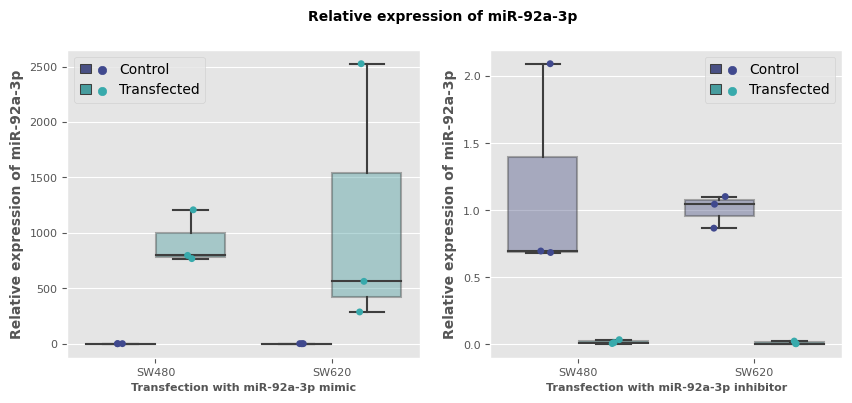

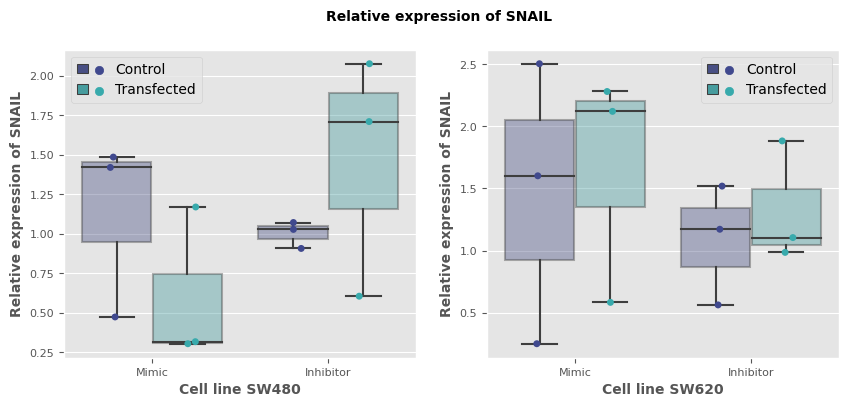

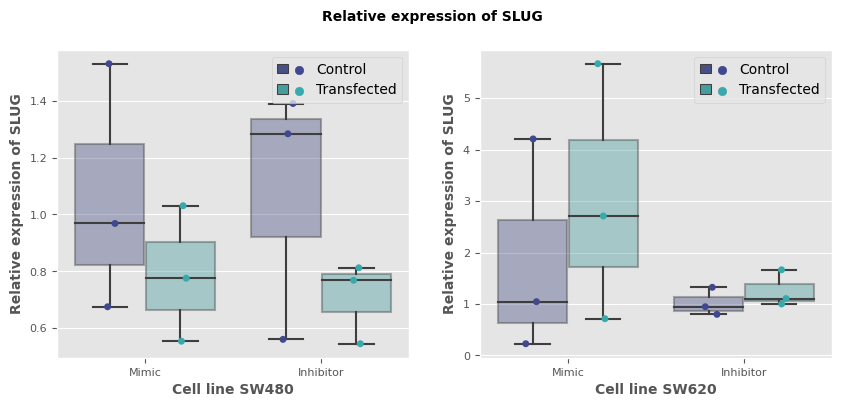

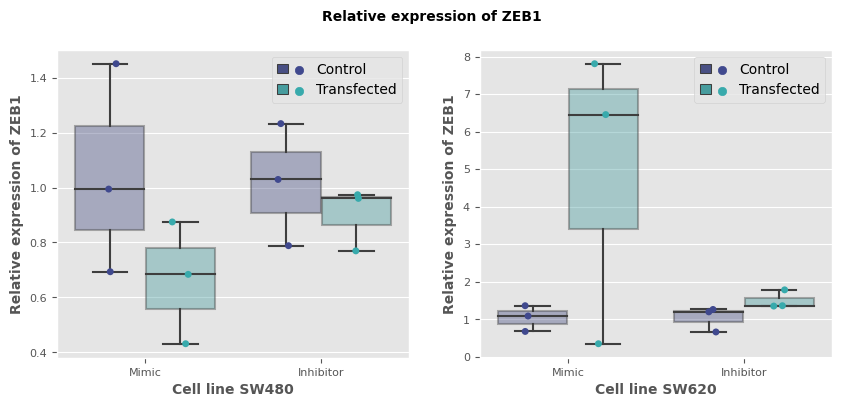

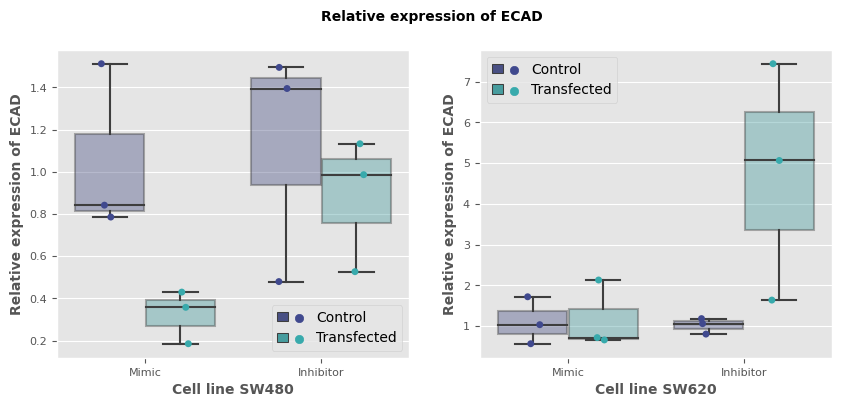

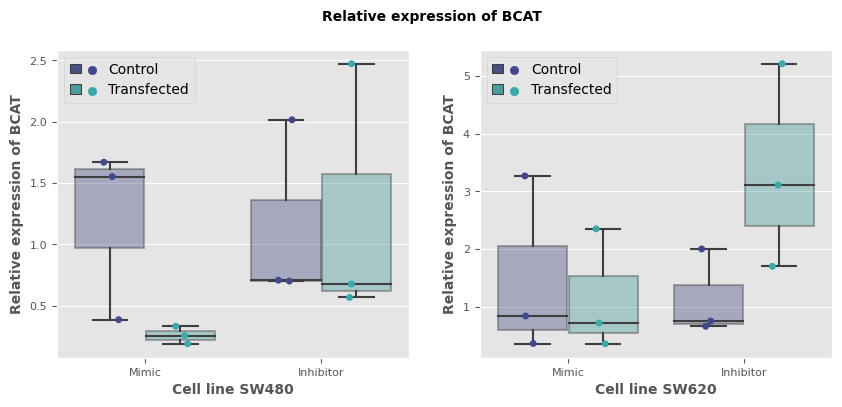

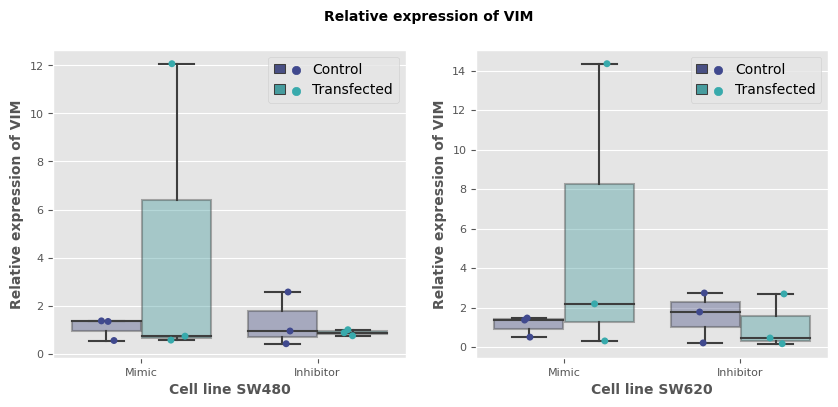

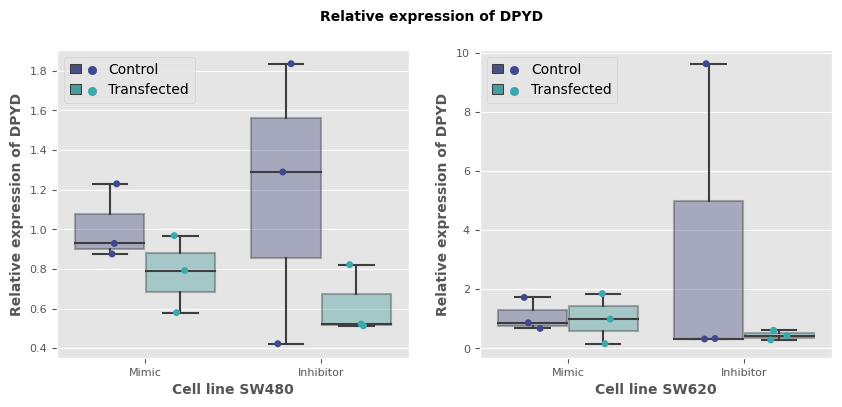

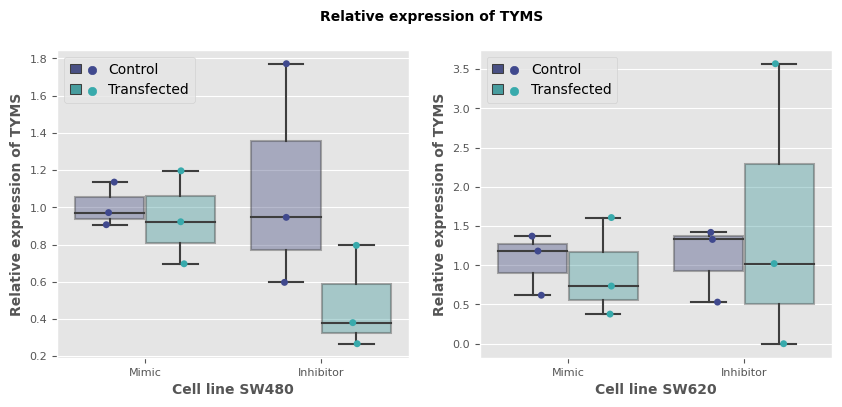

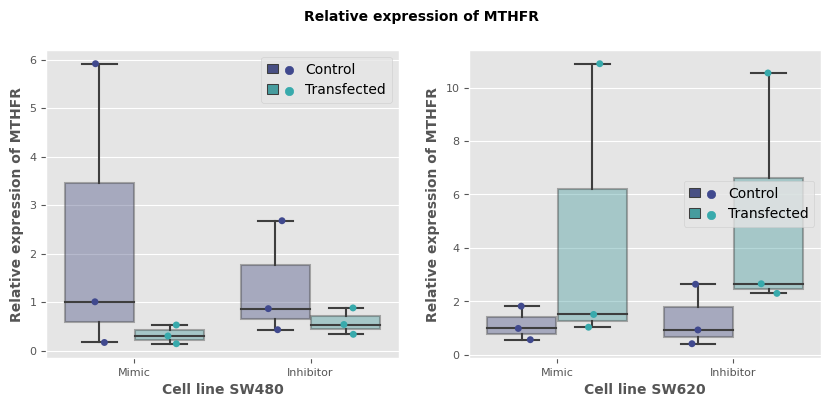

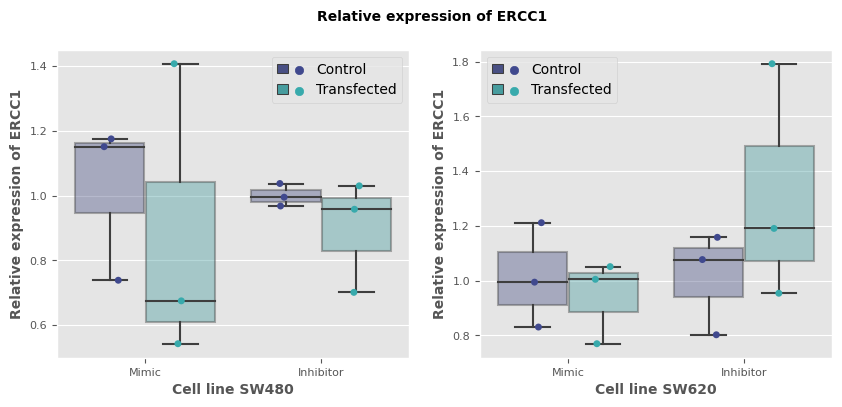

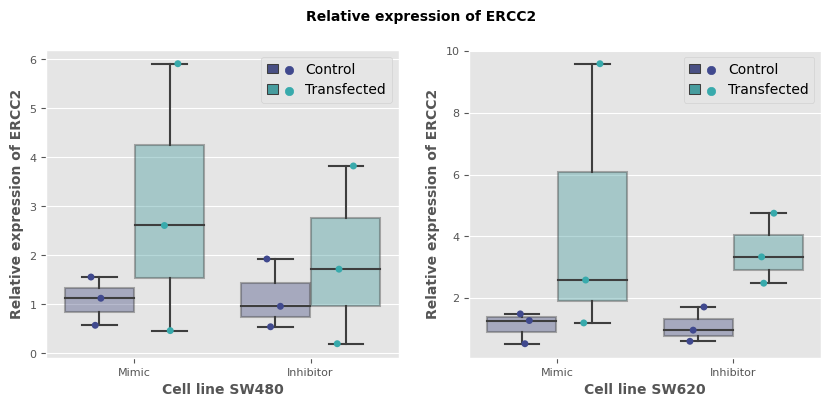

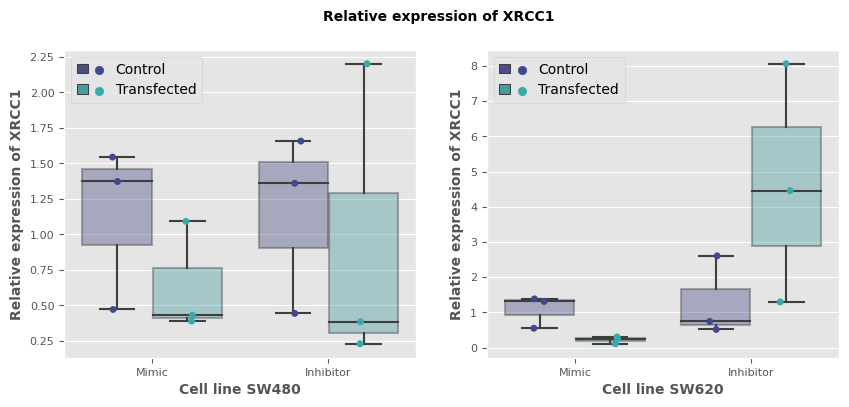

In [9]:
descriptive_graphs(df=df, columns=genExp)

**Conclusions**


From the graphics, we can observe a great range of dispersion of results of mRNA quantification, which will most likely be challenging for further statistical analysis. 

### Normality Test

In [10]:
# Loading libraries required for the statistical test
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [11]:
def normality_test(df : pd.DataFrame, columns: list, cell_line: str):
    '''Generates multiple Godness of Fit graphic and calculates Shapiro-Wilk normality test. Results are presented in a new Data Frame. 
    Parameters: 
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
        cell_line = string with name of cell line to test ('SW480' or 'SW620')
    p-value ≥ 0.05 Data has Gaussian distribution (Ho)
    p-value < 0.05 Data has Non-Gaussian distribution (Ha)
    '''
    mimic = []
    ctrl_mimic = []
    inhibit = []
    ctrl_inhibit = []
    interpret = []
    
    for i, colum in enumerate(columns):
        mim = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 1)][colum]
        ctrl_m = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 0)][colum]
        inh = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 1)][colum]
        ctrl_i = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 0)][colum]
     
        
        _, p1 = shapiro(mim)
        mimic.append(round(p1, 4))
        
        _, p2 = shapiro(ctrl_m)
        ctrl_mimic.append(round(p2, 4))
        
        _, p3 = shapiro(inh)
        inhibit.append(round(p3, 4))
        
        _, p4 = shapiro(ctrl_i)
        ctrl_inhibit.append(round(p4, 4))
        
        if (p1 < 0.05) or (p2 < 0.05) or (p3 < 0.05) or (p4 < 0.05):
            interpret.append('No: Non-Gaussian Distribution')
        else:
            interpret.append('Yes: Gaussian Distribution')
    
        print('Expression of: ' + str(colum))
        
        f, ax = plt.subplots(nrows=2,ncols=2, figsize= (10,12))
        qqplot(mim, line='s', ax=ax[0,0])
        qqplot(ctrl_m, line='s', ax=ax[0,1])
        qqplot(inh, line='s', ax=ax[1,0])
        qqplot(ctrl_i, line='s', ax=ax[1,1])
        ax[0,0].set_title('Mimic')
        ax[0,1].set_title('Mimic Control')
        ax[1,0].set_title('Inhibitor')
        ax[1,1].set_title('Inhibitor Control')

        plt.show()
        
        
    norm_test  = pd.DataFrame({
        'Expression of:': columns,
        'p_value mimic': mimic,
        'p_value control mimic': ctrl_mimic,
        'p-value inhibitor' : inhibit,
        'p-value control inhibitor': ctrl_inhibit,
        'Pass Normality Test?': interpret})
    
    return norm_test

#### Normality test - mRNA and microRNA expression - SW480 cell line

Expression of: miR-92a-3p


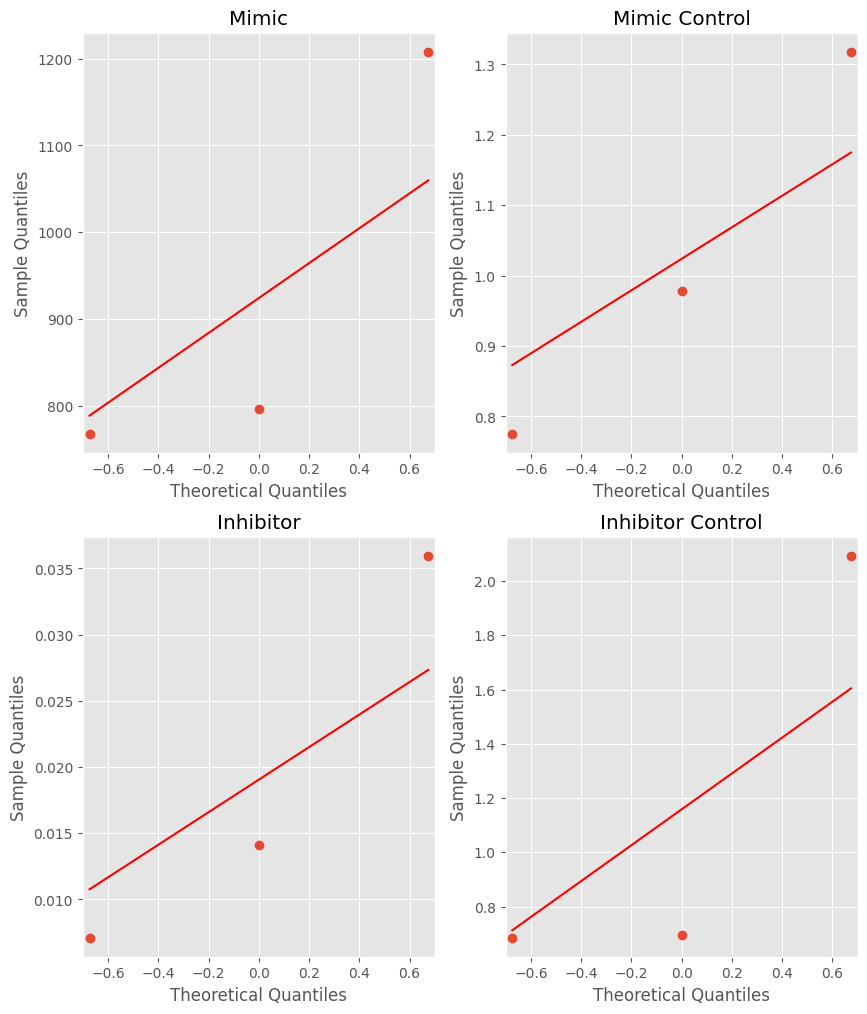

Expression of: SNAIL


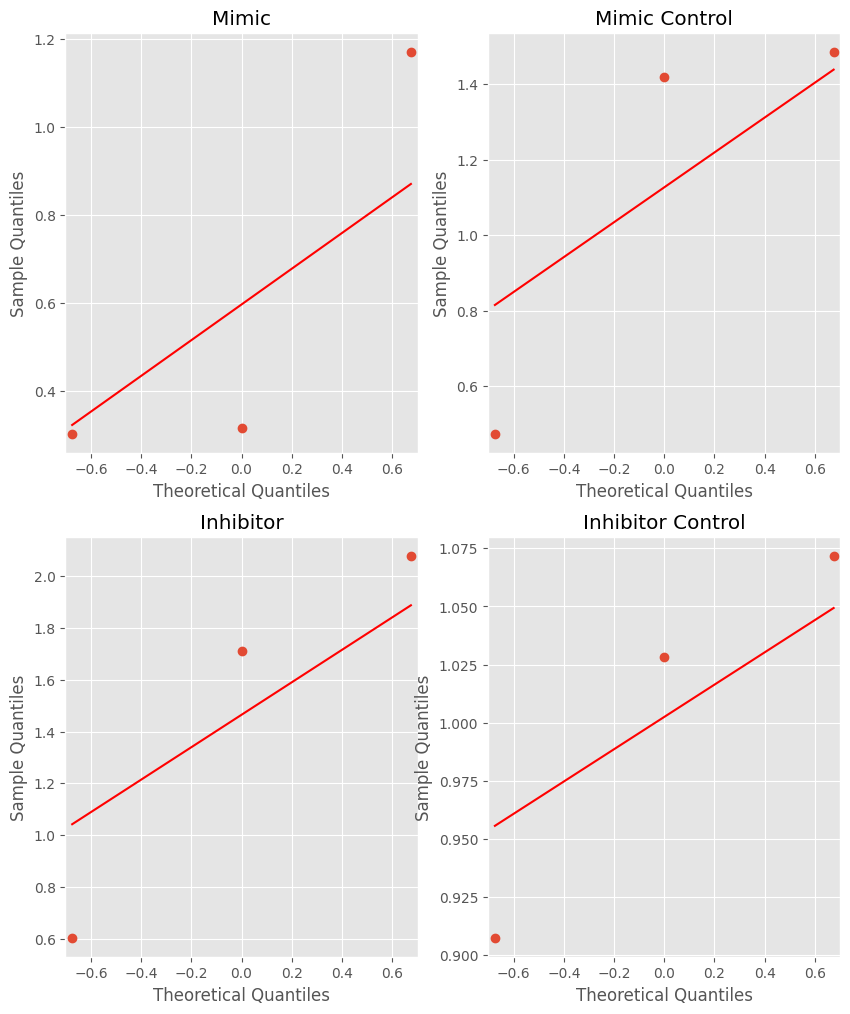

Expression of: SLUG


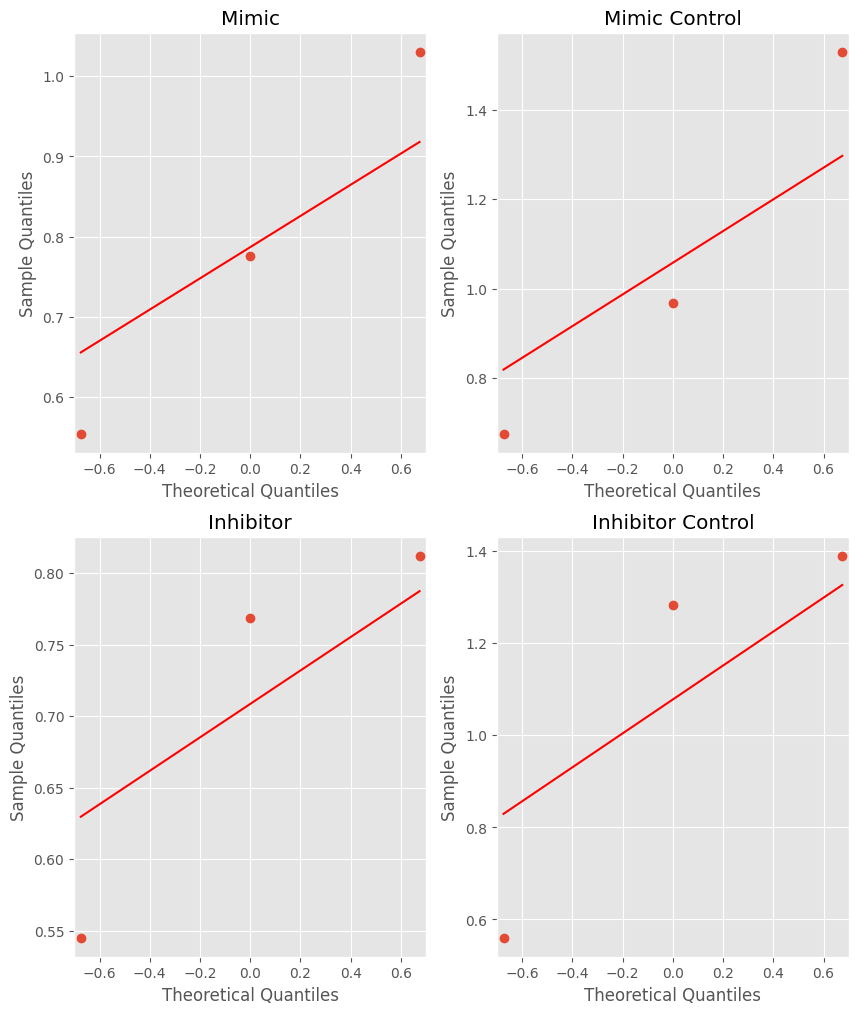

Expression of: ZEB1


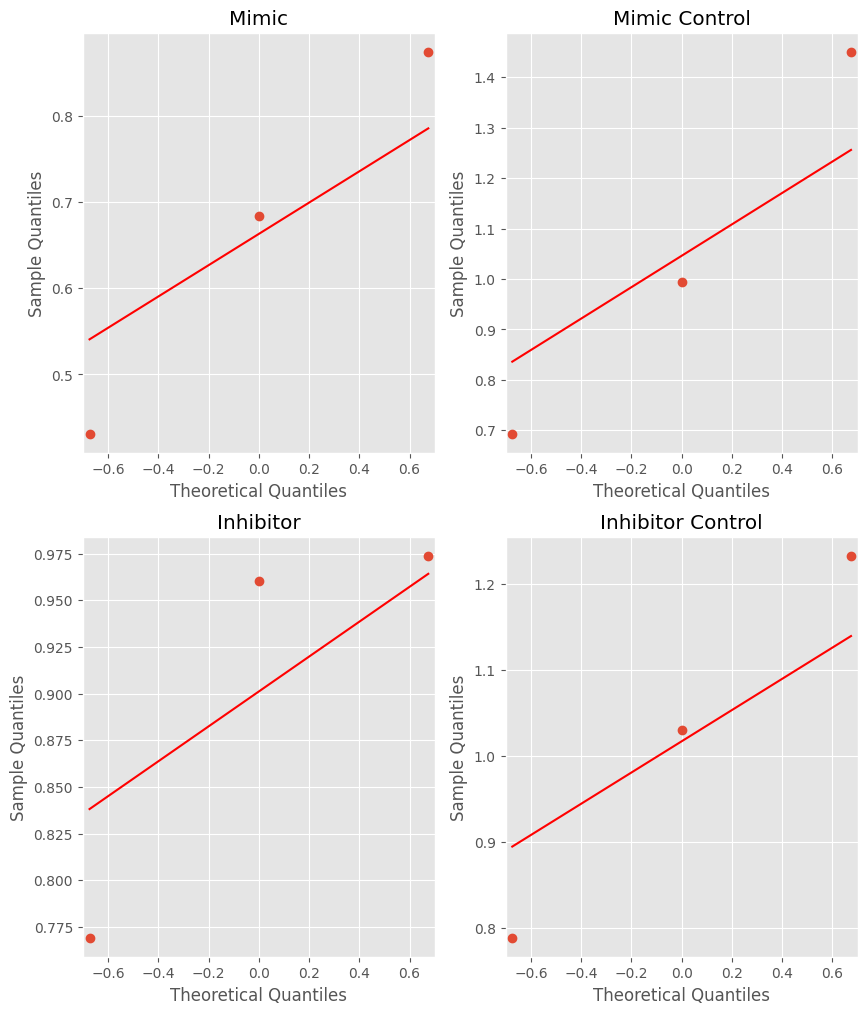

Expression of: ECAD


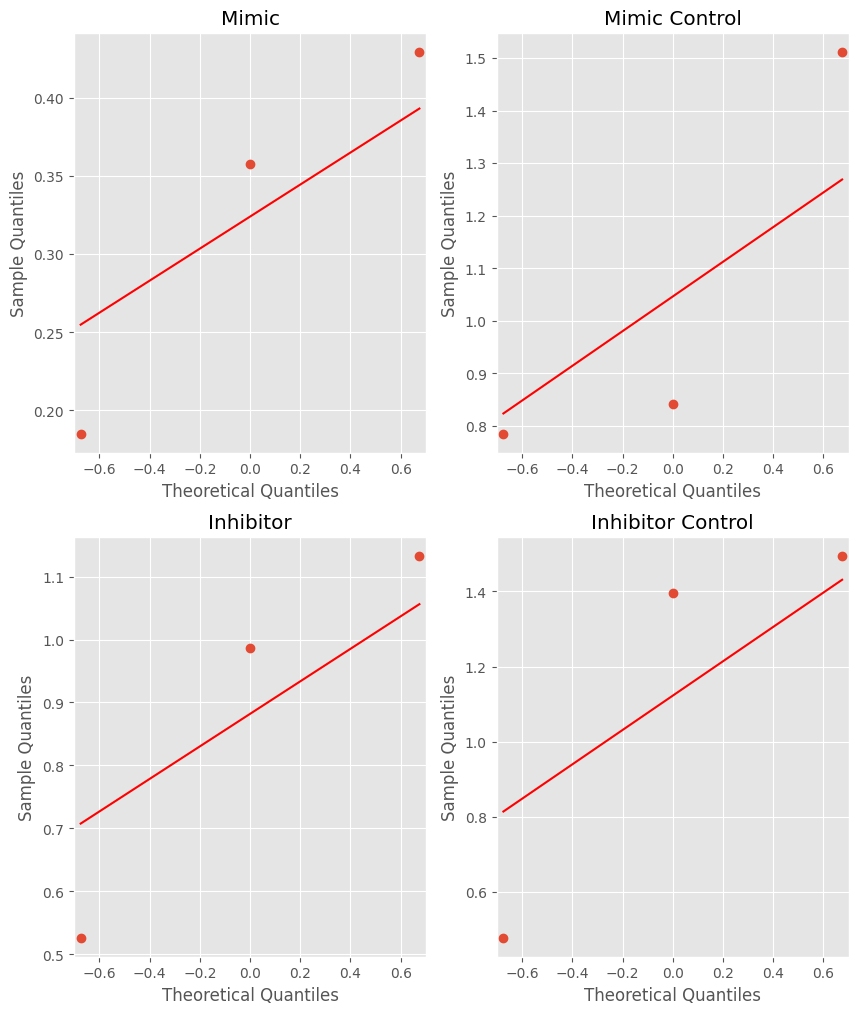

Expression of: BCAT


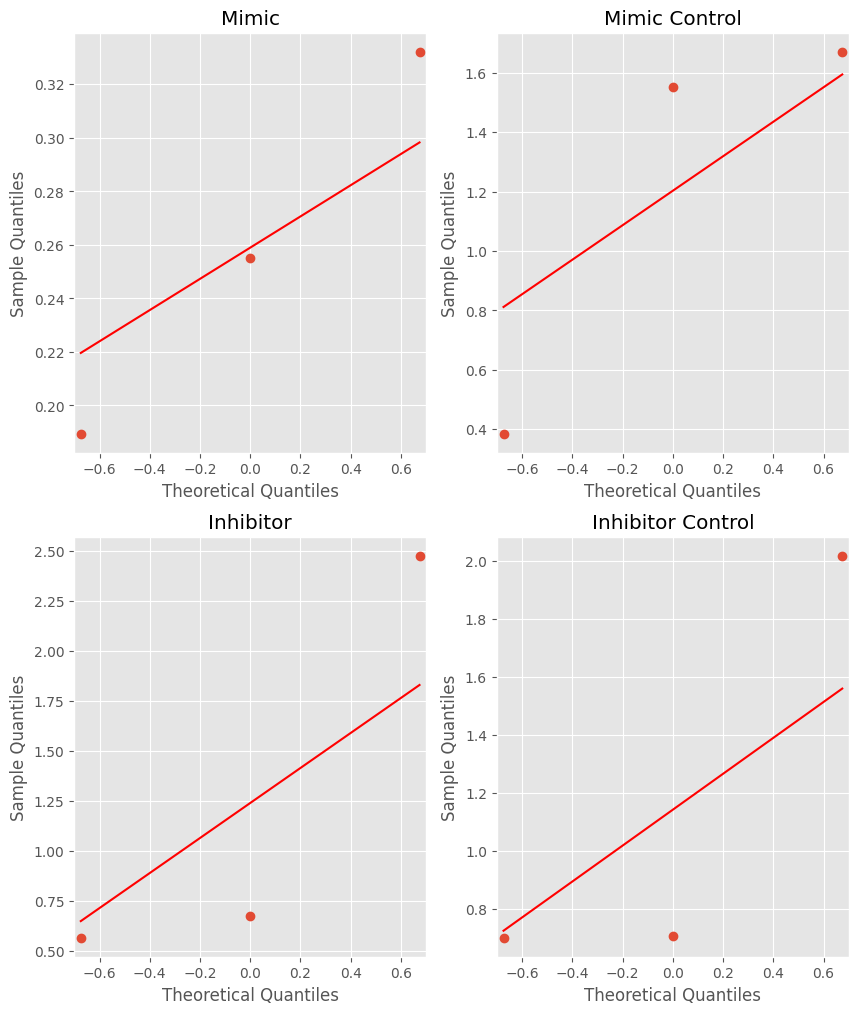

Expression of: VIM


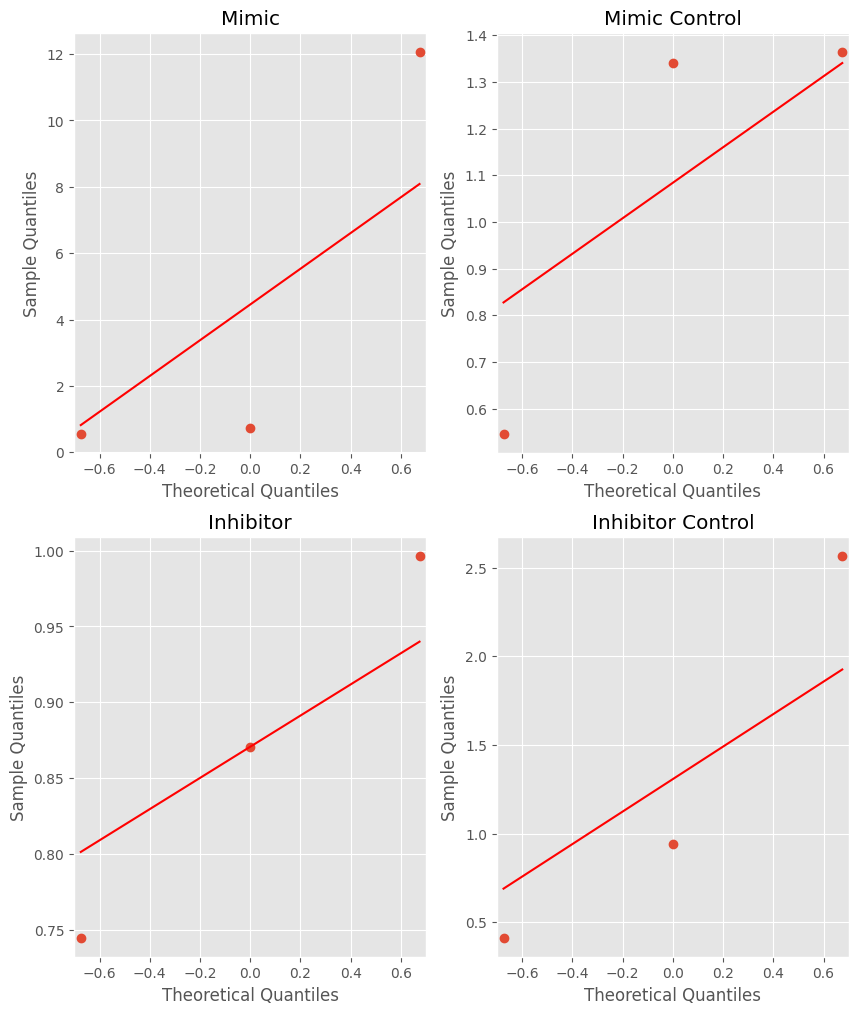

Expression of: DPYD


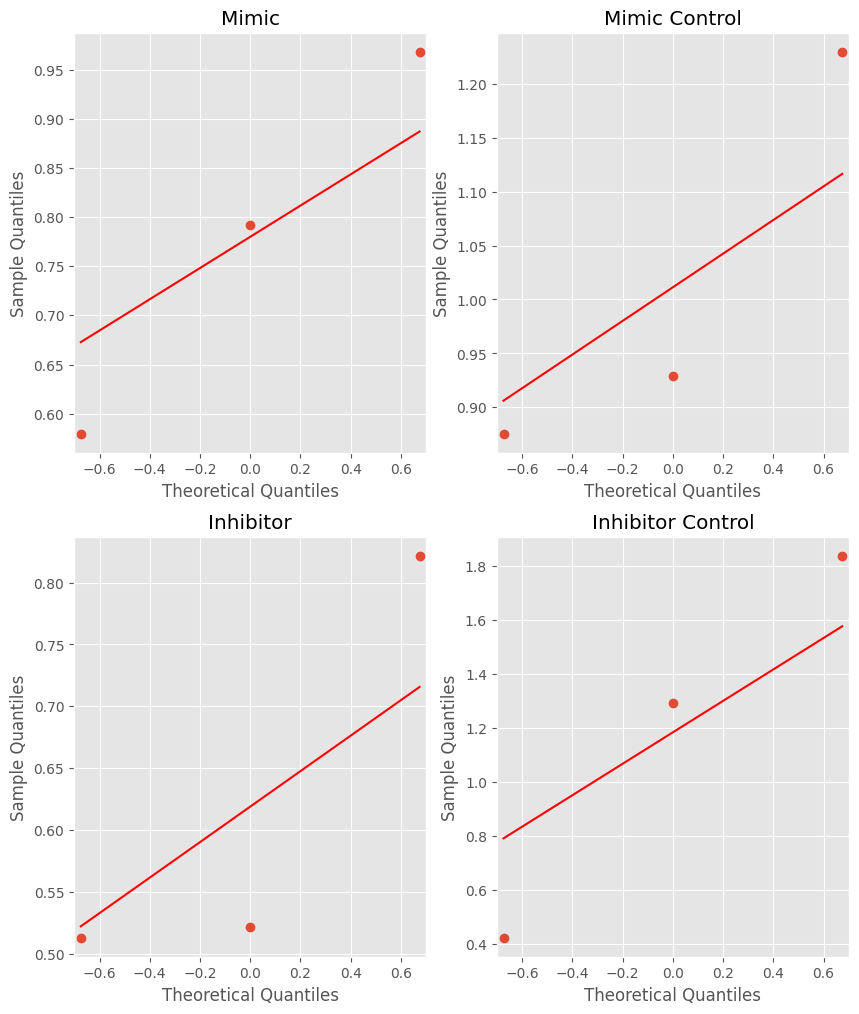

Expression of: TYMS


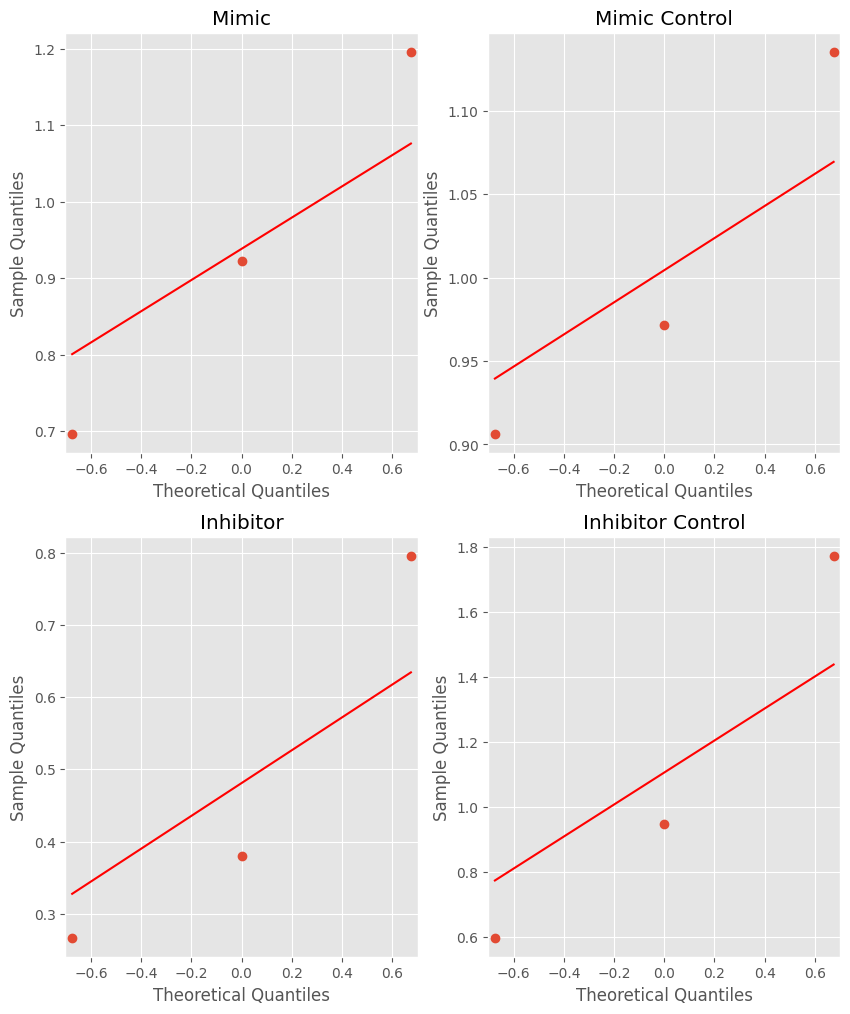

Expression of: MTHFR


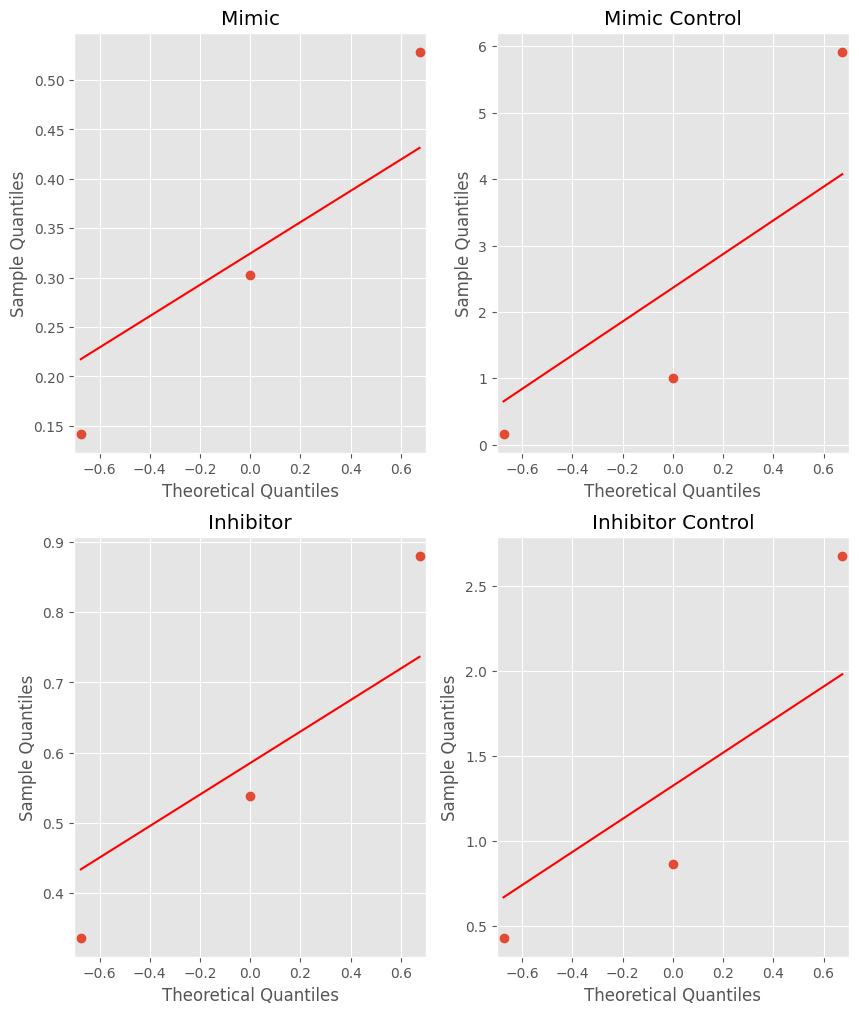

Expression of: ERCC1


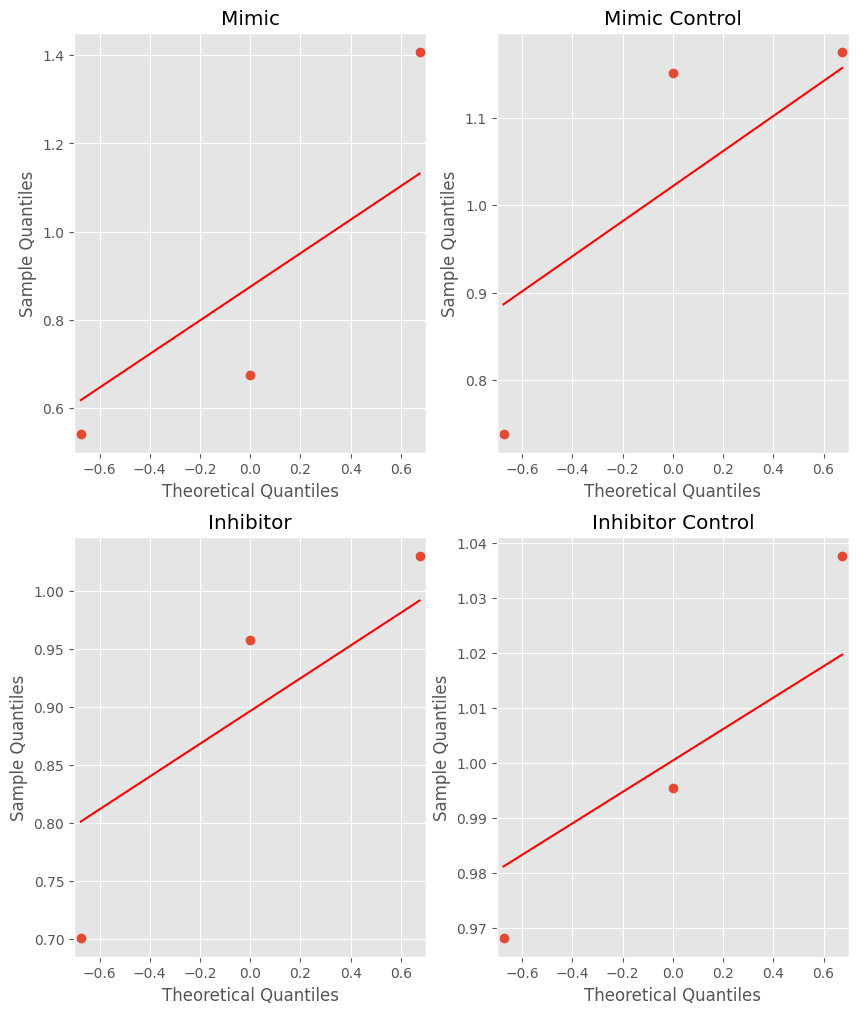

Expression of: ERCC2


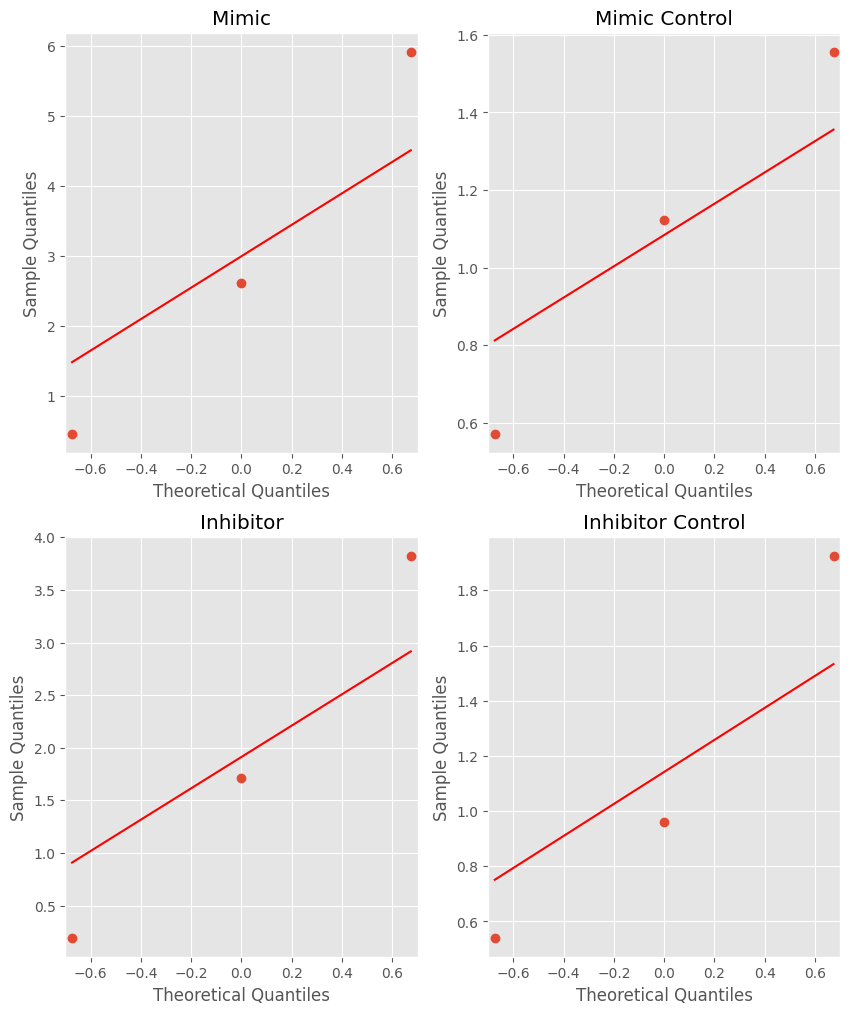

Expression of: XRCC1


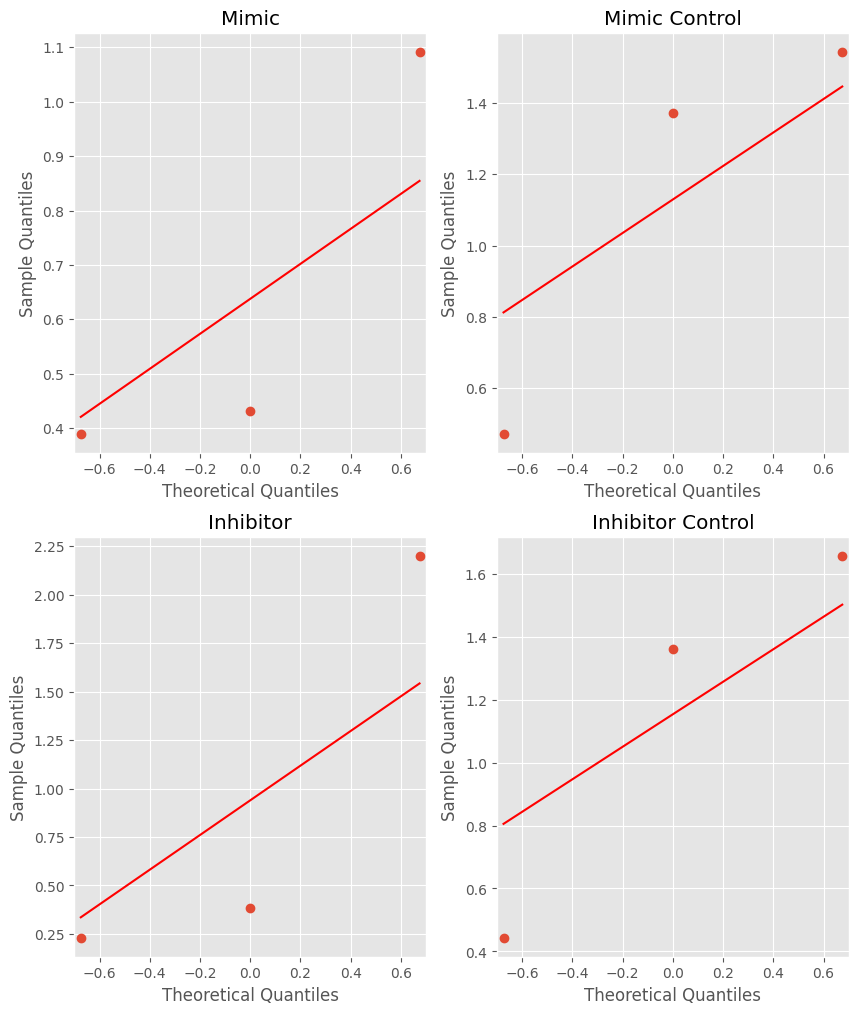

Expression of:  p_value mimic  p_value control mimic  p-value inhibitor  \
0      miR-92a-3p         0.1123                 0.7235             0.4465   
1           SNAIL         0.0248                 0.1104             0.4610   
2            SLUG         0.9225                 0.6571             0.2934   
3            ZEB1         0.8467                 0.7746             0.1120   
4            ECAD         0.5556                 0.1333             0.4469   
5            BCAT         0.9141                 0.1578             0.0978   
6             VIM         0.0239                 0.0481             0.9989   
7            DPYD         0.8982                 0.2666             0.0487   
8            TYMS         0.8941                 0.5333             0.3913   
9           MTHFR         0.8134                 0.2588             0.7187   
10          ERCC1         0.2724                 0.0942             0.4024   
11          ERCC2         0.7672                 0.8667             0.8227   
12          XRCC1         0.1000                 0.2857             0.1348   

    p-value control inhibitor           Pass Normality Test?  
0                      0.0132  No: Non-Gaussian Distribution  
1                      0.4956  No: Non-Gaussian Distribution  
2                      0.2259     Yes: Gaussian Distribution  
3                      0.9062     Yes: Gaussian Distribution  
4                      0.1711     Yes: Gaussian Distribution  
5                      0.0092  No: Non-Gaussian Distribution  
6                      0.4549  No: Non-Gaussian Distribution  
7                      0.7517  No: Non-Gaussian Distribution  
8                      0.5611     Yes: Gaussian Distribution  
9                      0.3498     Yes: Gaussian Distribution  
10                     0.7624     Yes: Gaussian Distribution  
11                     0.5706     Yes: Gaussian Distribution  
12                     0.4528     Yes: Gaussian Distribution

In [12]:
normality_test(df=df, columns=genExp, cell_line='SW480')

#### Normality test - mRNA and microRNA expression - SW620 cell line

Expression of: miR-92a-3p


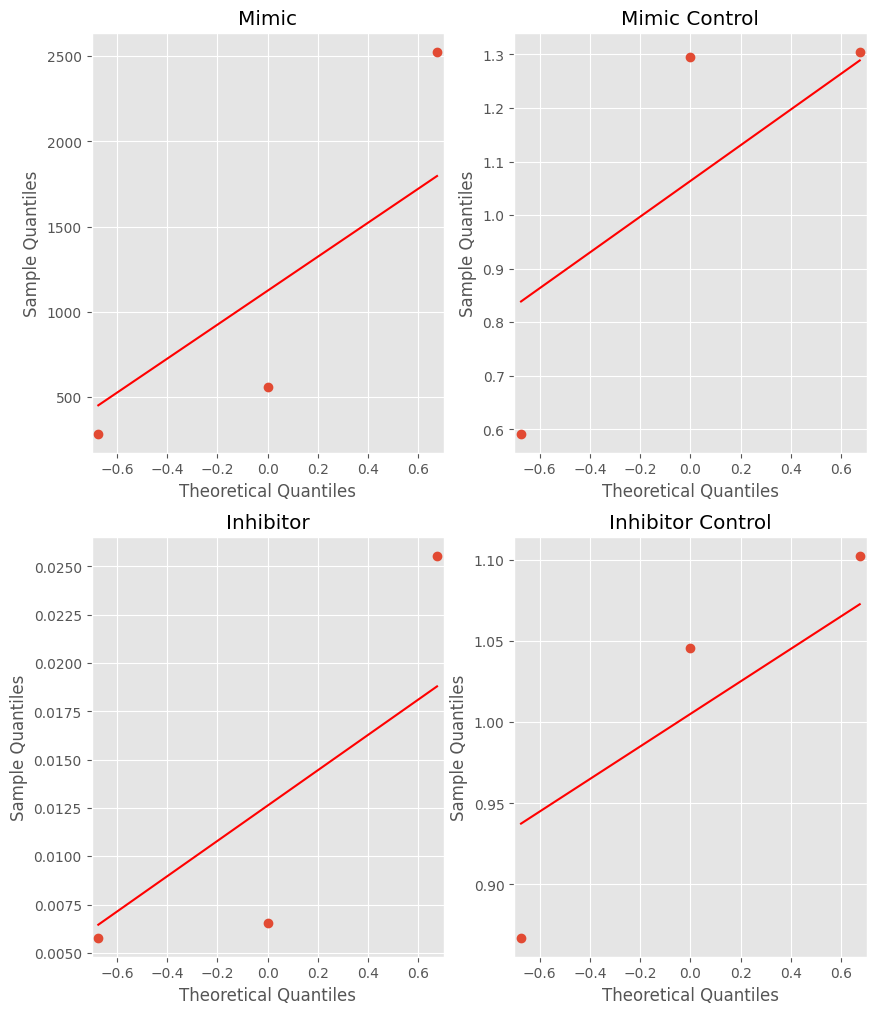

Expression of: SNAIL


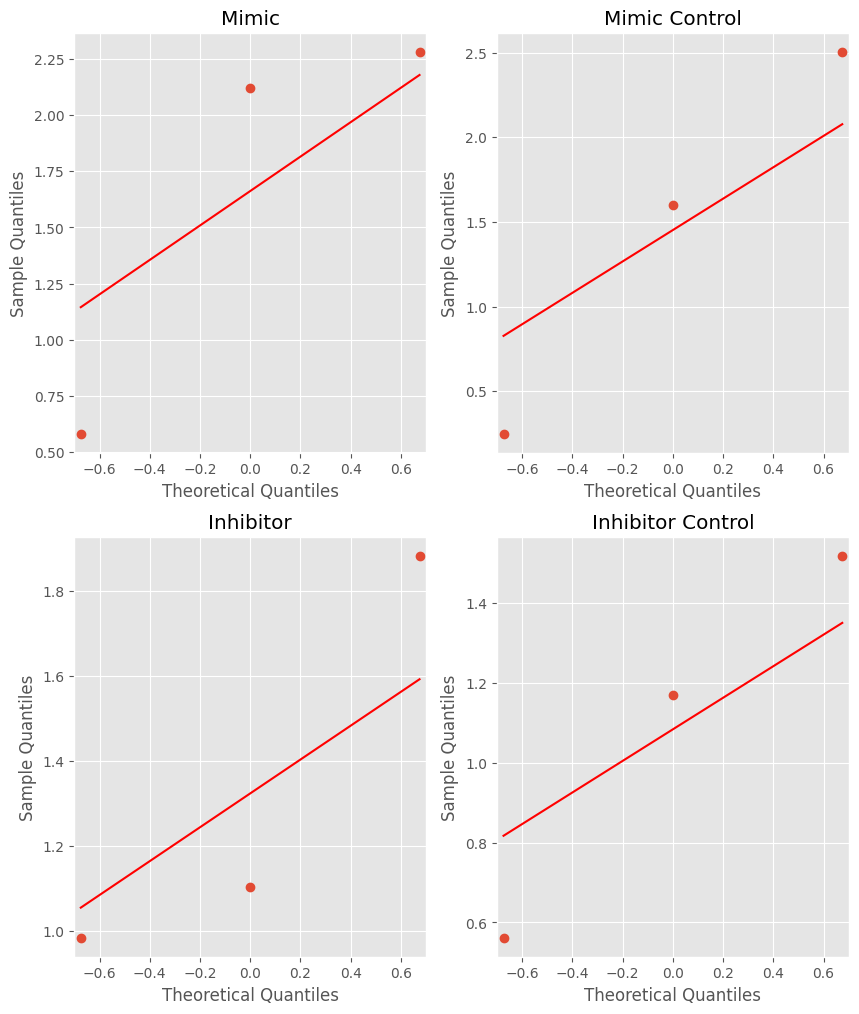

Expression of: SLUG


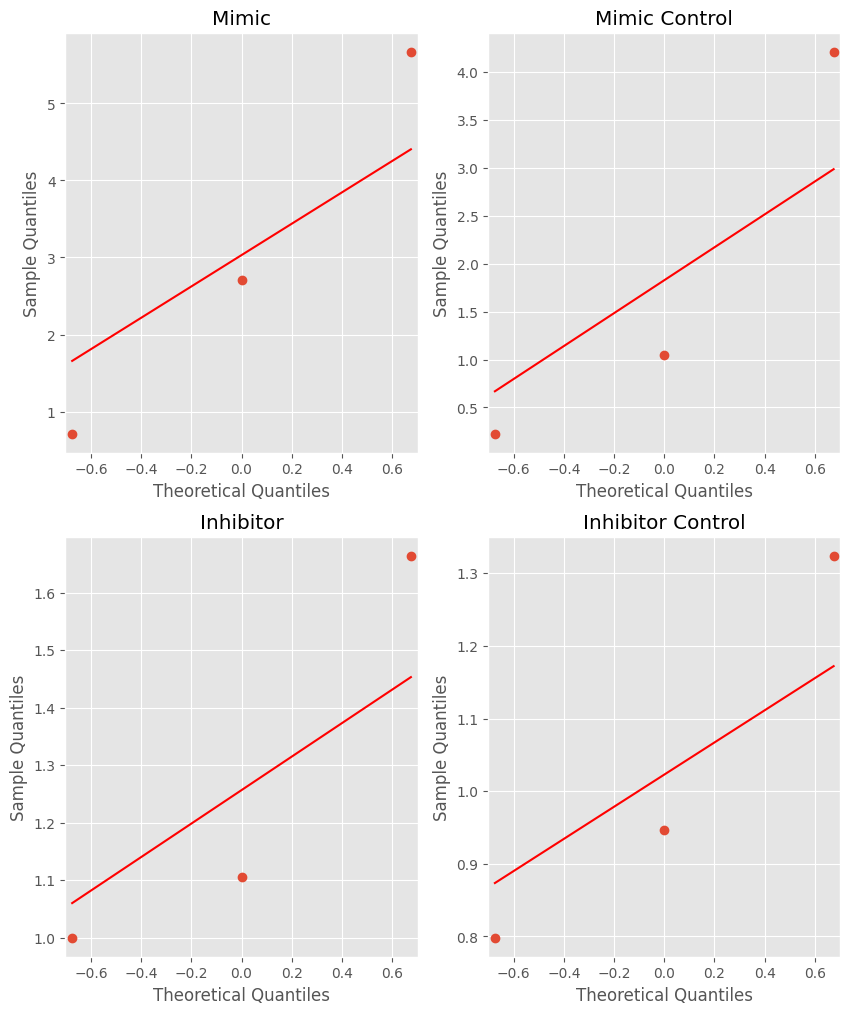

Expression of: ZEB1


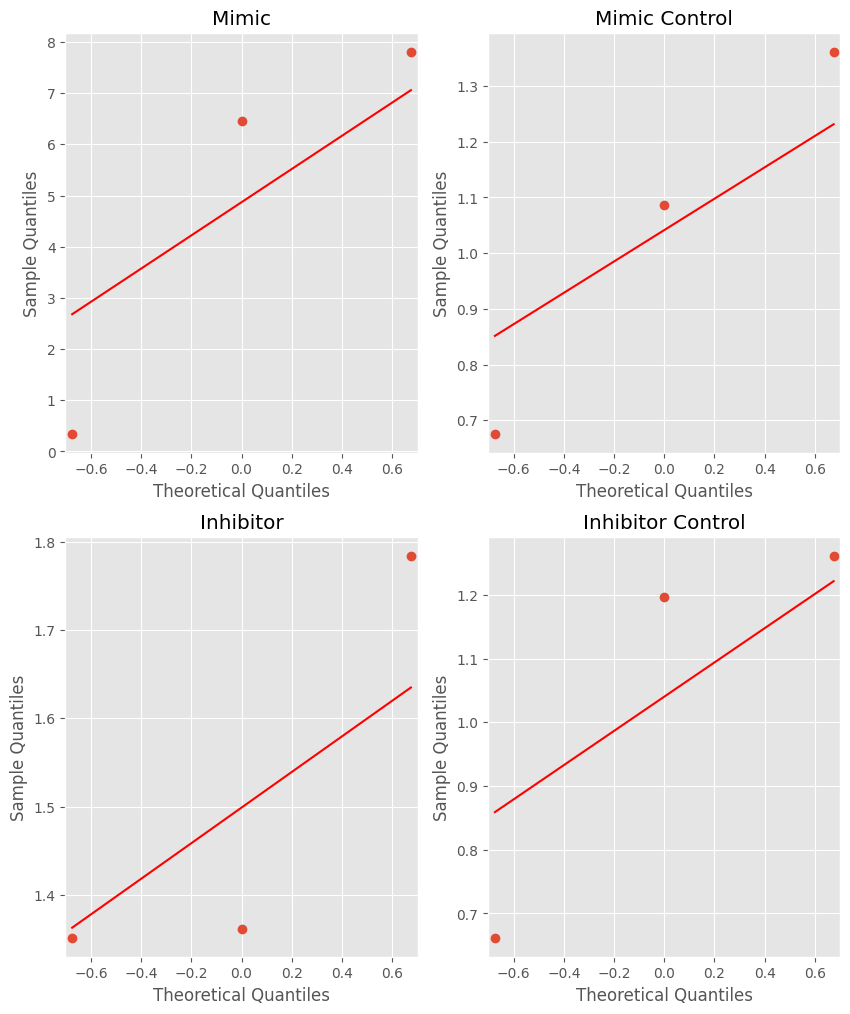

Expression of: ECAD


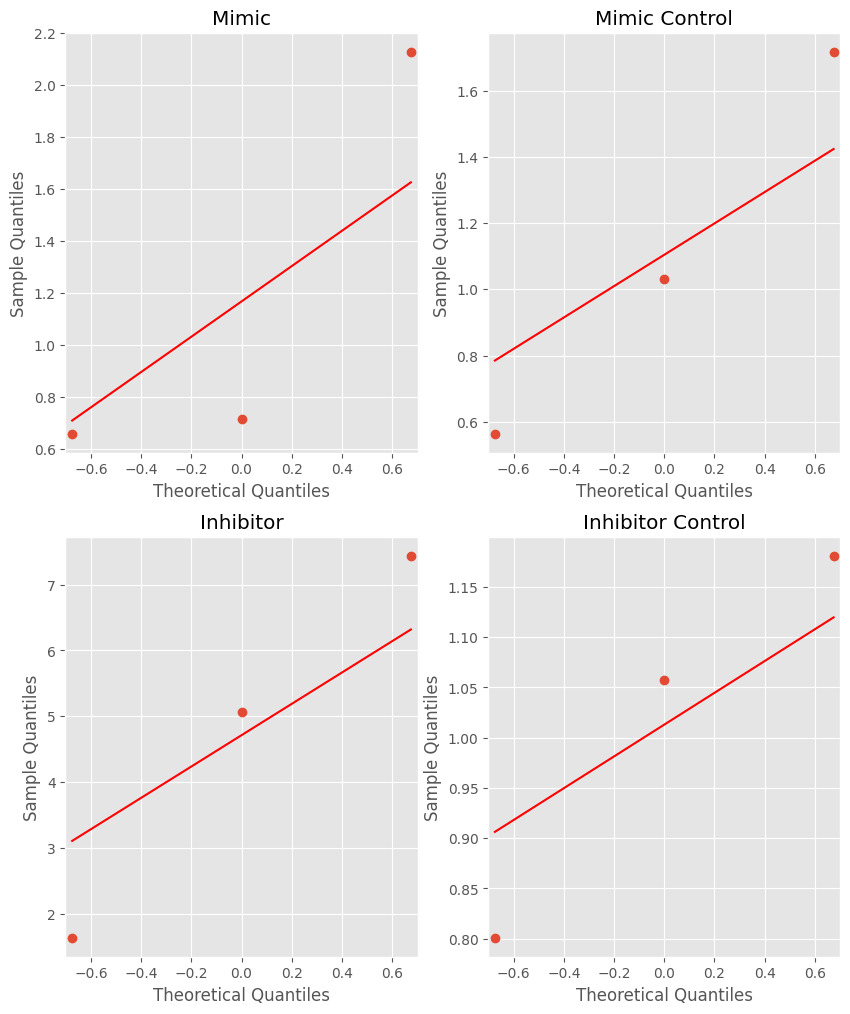

Expression of: BCAT


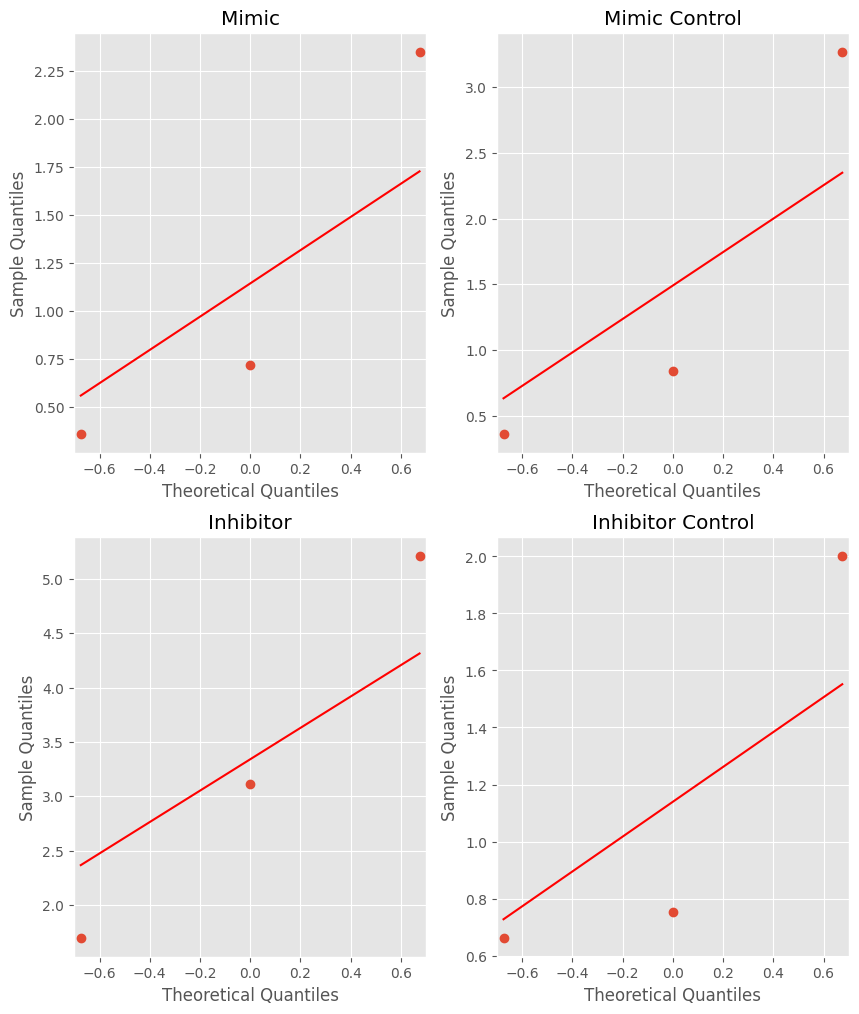

Expression of: VIM


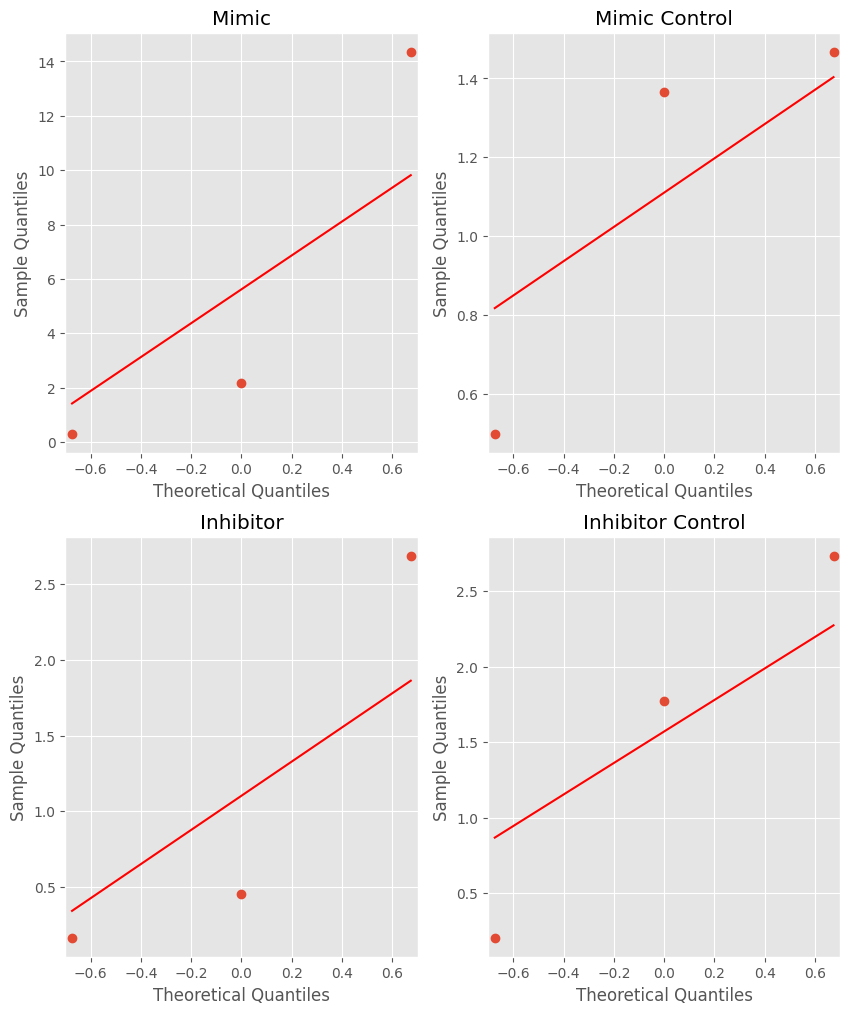

Expression of: DPYD


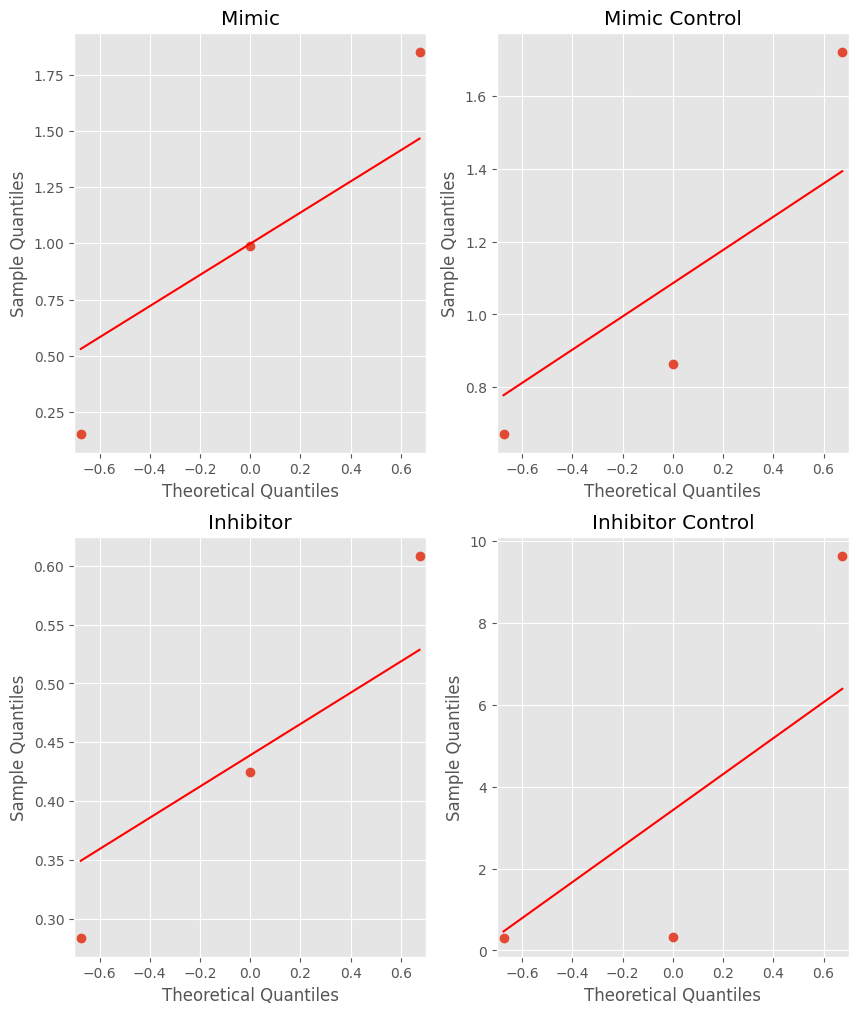

Expression of: TYMS


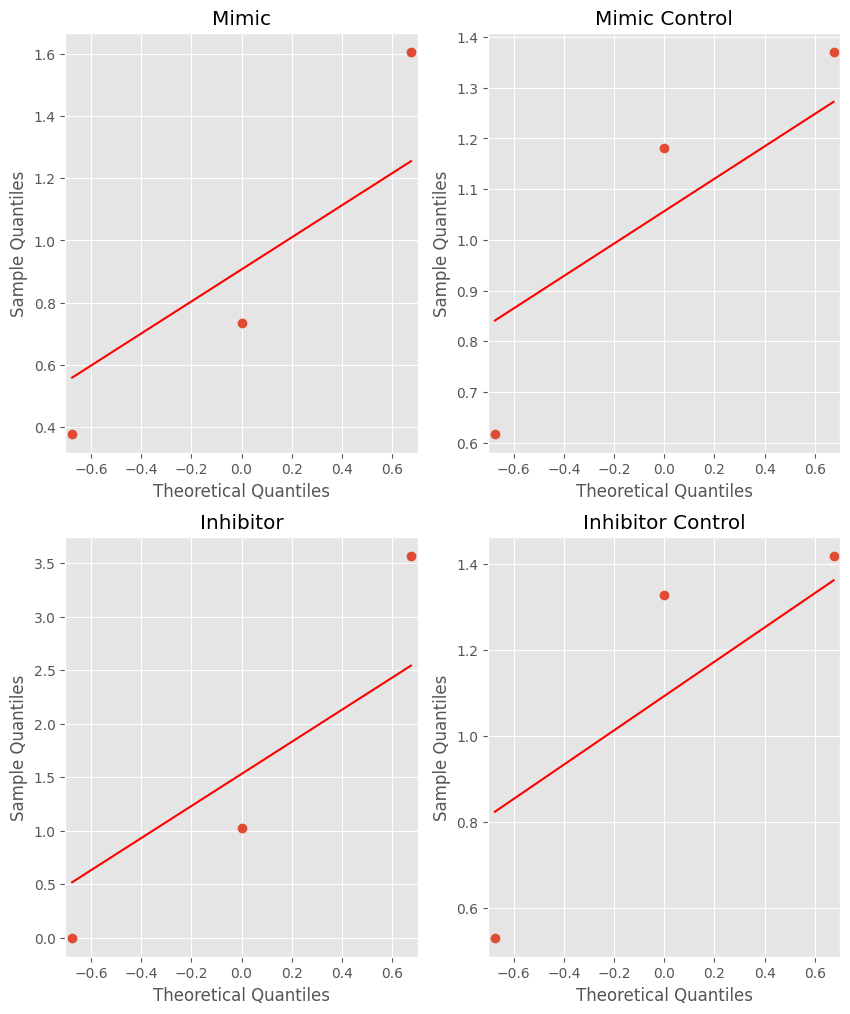

Expression of: MTHFR


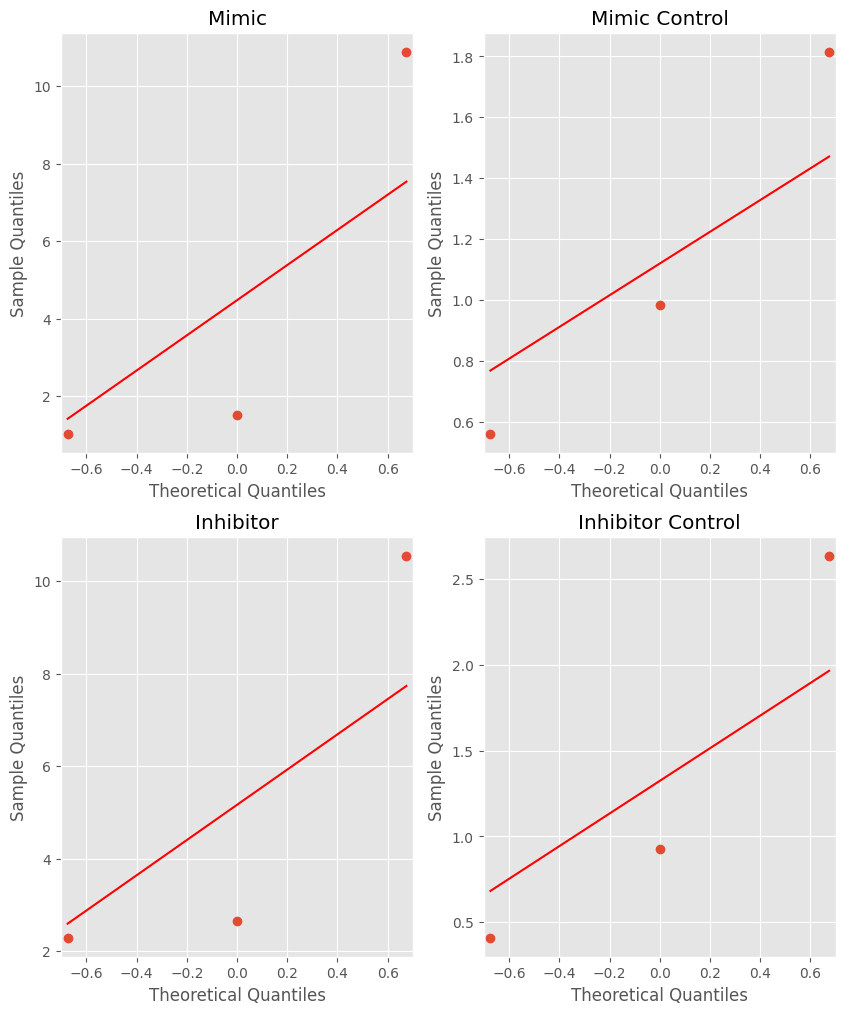

Expression of: ERCC1


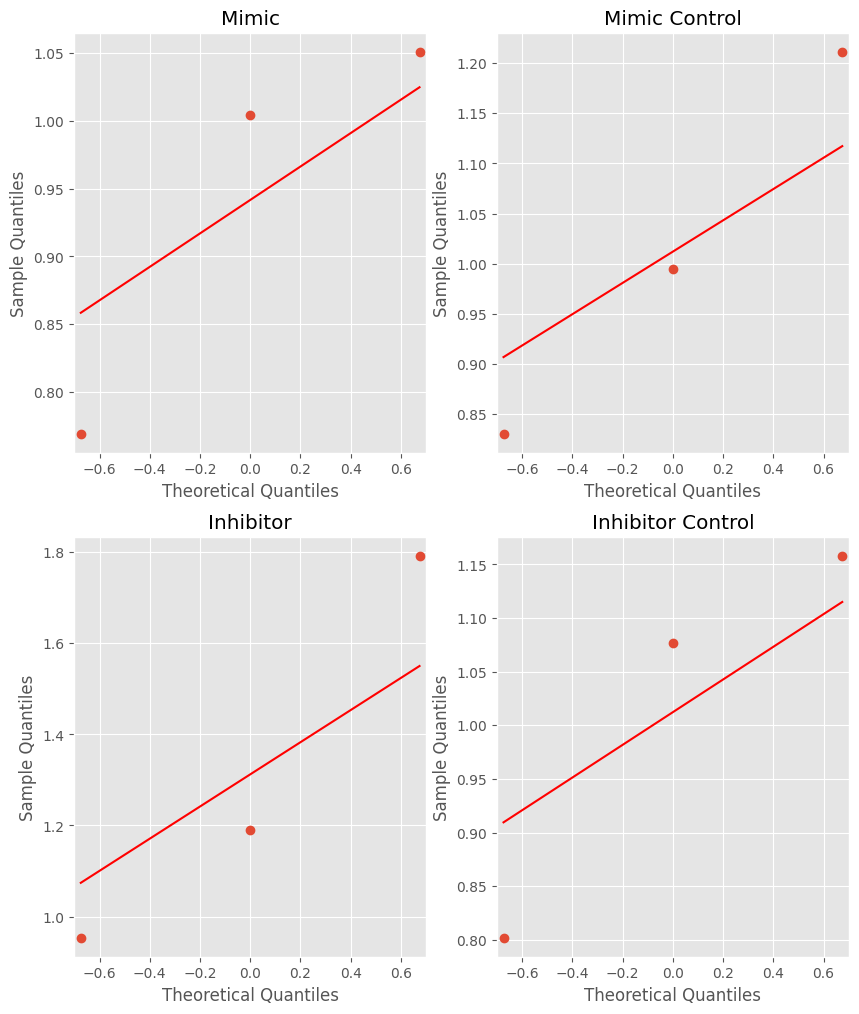

Expression of: ERCC2


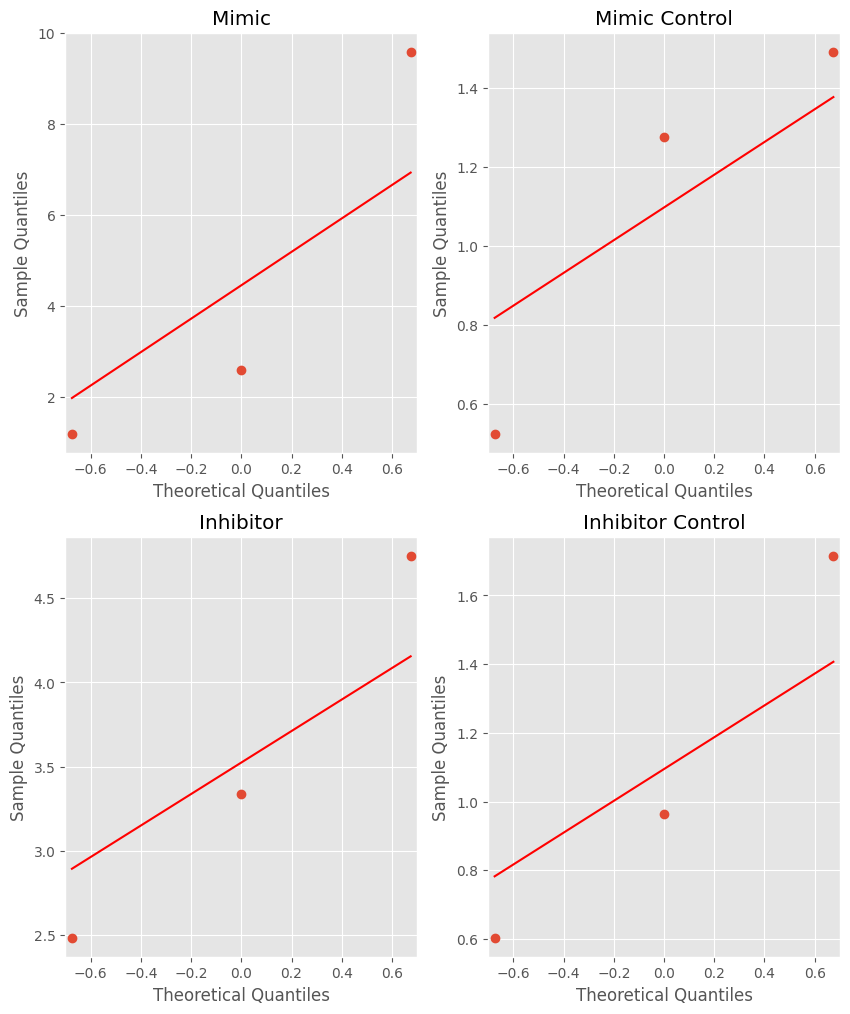

Expression of: XRCC1


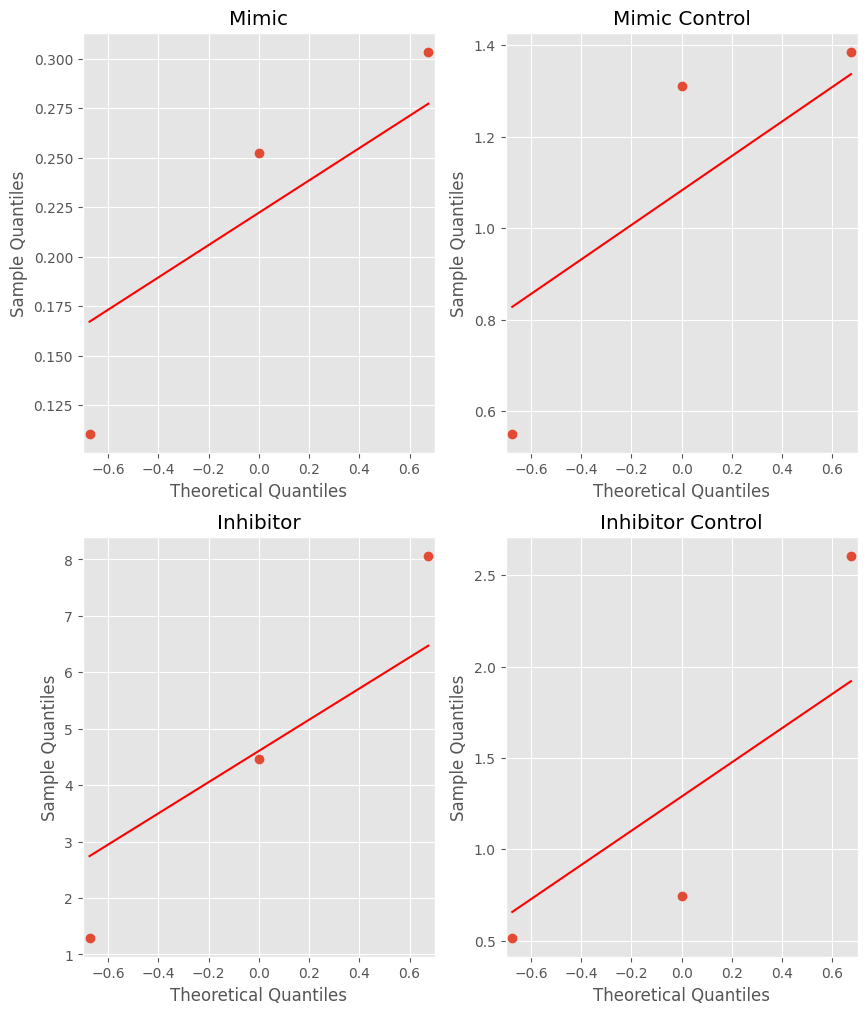

Expression of:  p_value mimic  p_value control mimic  p-value inhibitor  \
0      miR-92a-3p         0.2164                 0.0246             0.0638   
1           SNAIL         0.1632                 0.7811             0.2342   
2            SLUG         0.7865                 0.3736             0.2839   
3            ZEB1         0.3272                 0.7818             0.0364   
4            ECAD         0.0653                 0.7920             0.8009   
5            BCAT         0.3238                 0.2928             0.7830   
6             VIM         0.2360                 0.1853             0.2003   
7            DPYD         0.9816                 0.3277             0.8519   
8            TYMS         0.5461                 0.4674             0.5377   
9           MTHFR         0.0820                 0.6438             0.0737   
10          ERCC1         0.2939                 0.8464             0.5301   
11          ERCC2         0.2960                 0.4087             0.7277   
12          XRCC1         0.4922                 0.1548             0.9274   

    p-value control inhibitor           Pass Normality Test?  
0                      0.4476  No: Non-Gaussian Distribution  
1                      0.7009     Yes: Gaussian Distribution  
2                      0.5270     Yes: Gaussian Distribution  
3                      0.1857  No: Non-Gaussian Distribution  
4                      0.6220     Yes: Gaussian Distribution  
5                      0.1158     Yes: Gaussian Distribution  
6                      0.7375     Yes: Gaussian Distribution  
7                      0.0030  No: Non-Gaussian Distribution  
8                      0.1768     Yes: Gaussian Distribution  
9                      0.4261     Yes: Gaussian Distribution  
10                     0.4194     Yes: Gaussian Distribution  
11                     0.6182     Yes: Gaussian Distribution  
12                     0.1891     Yes: Gaussian Distribution

In [13]:
normality_test(df=df, columns=genExp, cell_line='SW620')

**Conclusions**


From the graphics and Shapiro-Wilk test results, we determine that, although not all data points align with the normality line in the Q-Q plots, there is not enough evidence to confirm that the results do not align with Gaussian distribution (p-value > 0.05).

Non-normal distribution is confirmed, and therefore, non-parametric tests must be performed for the following genes:

- SW480: miR-92a-3p, SNAIL, BCAT, VIM and DPYD.
- SW620: miR-92a-3p, ZEB1, and DPYD.

### Levene's test for equality of Variances

In [14]:
# Loading libraries required for the statistical test
from scipy.stats import levene

In [15]:
def levene_test(df: pd.DataFrame, columns: list, cell_line: str):
    '''Runs Levene test for four different experimental conditions and return a Data Frame showing results ad interpretation
    Parameters:
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
        cell_line = string with name of cell line to test ('SW480' or 'SW620')
    p-value ≥ 0.05 Groups have equal variances (Ho)
    p-value < 0.05 Groups have significantly different variances (Ha)
    '''
    
    pv = []
    interpret = []
    
    for i, colum in enumerate(columns):
        mim = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 1)][colum]
        ctrl_m = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 0)][colum]
        inh = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 1)][colum]
        ctrl_i = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 0)][colum]
        
        _, p = levene(mim, ctrl_m, inh, ctrl_i)
        pv.append(p)
        
        if (p < 0.05):
            interpret.append('No: Variances are not equal')    
        else:
            interpret.append('Yes: Equal variances')
    
    lev_test  = pd.DataFrame({
        'Expression of:': columns,
        'p-value ': pv,
        'Pass Levene test': interpret})
    
    return lev_test

#### Levene's test - mRNA and microRNA expression - SW480 cell line

In [16]:
levene_test(df=df, columns=genExp, cell_line='SW480')

Expression of:  p-value       Pass Levene test
0      miR-92a-3p  0.362976  Yes: Equal variances
1           SNAIL  0.713842  Yes: Equal variances
2            SLUG  0.750805  Yes: Equal variances
3            ZEB1  0.583383  Yes: Equal variances
4            ECAD  0.824783  Yes: Equal variances
5            BCAT  0.781519  Yes: Equal variances
6             VIM  0.499949  Yes: Equal variances
7            DPYD  0.297871  Yes: Equal variances
8            TYMS  0.494280  Yes: Equal variances
9           MTHFR  0.419674  Yes: Equal variances
10          ERCC1  0.602885  Yes: Equal variances
11          ERCC2  0.328368  Yes: Equal variances
12          XRCC1  0.868054  Yes: Equal variances

#### Levene's test - mRNA and microRNA expression - SW620 cell line

In [17]:
levene_test(df=df, columns=genExp, cell_line='SW620')

Expression of:  p-value       Pass Levene test
0      miR-92a-3p  0.291815  Yes: Equal variances
1           SNAIL  0.768072  Yes: Equal variances
2            SLUG  0.325416  Yes: Equal variances
3            ZEB1  0.283926  Yes: Equal variances
4            ECAD  0.183782  Yes: Equal variances
5            BCAT  0.820342  Yes: Equal variances
6             VIM  0.409367  Yes: Equal variances
7            DPYD  0.528432  Yes: Equal variances
8            TYMS  0.402829  Yes: Equal variances
9           MTHFR  0.689995  Yes: Equal variances
10          ERCC1  0.627739  Yes: Equal variances
11          ERCC2  0.391208  Yes: Equal variances
12          XRCC1  0.152218  Yes: Equal variances

**Conclusions**


From the results of Levene's test, we can confirm equal variances between result groups for all genes, which is required for direct statistical tests such as the T-Test, ANOVA, and non-parametric variants. 

### Student T-Test and Kruskal-Wallis H-Test for median comparison between two groups

In [18]:
from scipy.stats import ttest_ind
from scipy.stats import kruskal

In [19]:
def two_groups_test(df : pd.DataFrame, columns: list, cell_line: str):
    '''Calculates Student T-test or Kruskal Wallis H-test depending of if the data has normal distribution or not. Results are presented in a new Data Frame.
    Parameters: 
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
        cell_line = string with name of cell line to test ('SW480' or 'SW620')
    p-value ≥ 0.05 There is no statistically significant difference between the medians of the two groups (Ho)
    p-value < 0.05 The medians are statistically different (Ha)
    '''
    stat_mim_ctrlMim = []
    pv_mim_ctrlMim = []
    stat_inh_ctrl_i = []
    pv_inh_ctrl_i = []
    stat_ctrlMim_ctrlInh = []
    pv_ctrlMim_ctrlInh = []
    test_type = []
    
    for i, colum in enumerate(columns):
        mim = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 1)][colum]
        ctrl_m = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 0)][colum]
        inh = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 1)][colum]
        ctrl_i = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 0)][colum]
        
        _, p_1 = shapiro(mim)
        _, p_2 = shapiro(ctrl_m)
        _, p_3 = shapiro(inh)       
        _, p_4 = shapiro(ctrl_i)
        
        if (p_1 < 0.05) or (p_2 < 0.05) or (p_3 < 0.05) or (p_4 < 0.05):
            test_type.append('Non-Parametric Kruskal-Wallis Test')
            
            _, p1 = kruskal(ctrl_m, mim)
            pv_mim_ctrlMim.append(round(p1, 5))
            if p1 < 0.05:
                stat_mim_ctrlMim.append('Significant Difference')
            else:
                stat_mim_ctrlMim.append('non-significant')
            
            _, p2 = kruskal(ctrl_i, inh)
            pv_inh_ctrl_i.append(round(p2, 5))
            if p2 < 0.05:
                stat_inh_ctrl_i.append('Significant Difference')
            else:
                stat_inh_ctrl_i.append('non-significant')
            
            _, p3 = kruskal(ctrl_i, ctrl_m)
            pv_ctrlMim_ctrlInh.append(round(p3, 5))
            if p3 < 0.05:
                stat_ctrlMim_ctrlInh.append('Significant Difference')
            else:
                stat_ctrlMim_ctrlInh.append('non-significant')
                       
        else:
            test_type.append('Parametric T-Test')
            
            _, p1 = ttest_ind(ctrl_m, mim)
            pv_mim_ctrlMim.append(round(p1, 5))
            if p1 < 0.05:
                stat_mim_ctrlMim.append('Significant Difference')
            else:
                stat_mim_ctrlMim.append('non-significant')
            
            _, p2 = ttest_ind(ctrl_i, inh)
            pv_inh_ctrl_i.append(round(p2, 5))
            if p2 < 0.05:
                stat_inh_ctrl_i.append('Significant Difference')
            else:
                stat_inh_ctrl_i.append('non-significant')
            
            _, p3 = ttest_ind(ctrl_i, ctrl_m)
            pv_ctrlMim_ctrlInh.append(round(p3, 5))
            if p3 < 0.05:
                stat_ctrlMim_ctrlInh.append('Significant Difference')
            else:
                stat_ctrlMim_ctrlInh.append('non-significant')
           
             
    med_comp_test  = pd.DataFrame({
        'Expression of:': columns,
        'p_value mimic vs. ctrl': pv_mim_ctrlMim,
        'stat mimic vs. ctrl': stat_mim_ctrlMim,
        'p_value inhibitor vs. ctrl': pv_inh_ctrl_i,
        'stat inhibitor vs. ctrl': stat_inh_ctrl_i,
        'p-value crtl vs. ctrl' : pv_ctrlMim_ctrlInh,
        'stat crtl vs. ctrl' : stat_ctrlMim_ctrlInh,
        'Test Type': test_type})
    
    return med_comp_test

#### Mean Comparison - mRNA and microRNA expression - SW480 cell line

In [20]:
two_groups_test(df=df, columns=genExp, cell_line='SW480')

Expression of:  p_value mimic vs. ctrl     stat mimic vs. ctrl  \
0      miR-92a-3p                 0.04953  Significant Difference   
1           SNAIL                 0.12663         non-significant   
2            SLUG                 0.39708         non-significant   
3            ZEB1                 0.20743         non-significant   
4            ECAD                 0.04176  Significant Difference   
5            BCAT                 0.04953  Significant Difference   
6             VIM                 0.82726         non-significant   
7            DPYD                 0.27523         non-significant   
8            TYMS                 0.69984         non-significant   
9           MTHFR                 0.31966         non-significant   
10          ERCC1                 0.65462         non-significant   
11          ERCC2                 0.30109         non-significant   
12          XRCC1                 0.28916         non-significant   

    p_value inhibitor vs. ctrl stat inhibitor vs. ctrl  p-value crtl vs. ctrl  \
0                      0.04953  Significant Difference                0.51269   
1                      0.51269         non-significant                0.51269   
2                      0.24798         non-significant                0.95799   
3                      0.46849         non-significant                0.91379   
4                      0.55120         non-significant                0.85704   
5                      0.51269         non-significant                0.82726   
6                      0.82726         non-significant                0.82726   
7                      0.51269         non-significant                0.51269   
8                      0.17921         non-significant                0.79160   
9                      0.35387         non-significant                0.61731   
10                     0.36618         non-significant                0.88784   
11                     0.53257         non-significant                0.91312   
12                     0.78365         non-significant                0.96352   

   stat crtl vs. ctrl                           Test Type  
0     non-significant  Non-Parametric Kruskal-Wallis Test  
1     non-significant  Non-Parametric Kruskal-Wallis Test  
2     non-significant                   Parametric T-Test  
3     non-significant                   Parametric T-Test  
4     non-significant                   Parametric T-Test  
5     non-significant  Non-Parametric Kruskal-Wallis Test  
6     non-significant  Non-Parametric Kruskal-Wallis Test  
7     non-significant  Non-Parametric Kruskal-Wallis Test  
8     non-significant                   Parametric T-Test  
9     non-significant                   Parametric T-Test  
10    non-significant                   Parametric T-Test  
11    non-significant                   Parametric T-Test  
12    non-significant                   Parametric T-Test

#### Mean Comparison - mRNA and microRNA expression - SW620 cell line

In [21]:
two_groups_test(df=df, columns=genExp, cell_line='SW620')

Expression of:  p_value mimic vs. ctrl     stat mimic vs. ctrl  \
0      miR-92a-3p                 0.04953  Significant Difference   
1           SNAIL                 0.81749         non-significant   
2            SLUG                 0.55730         non-significant   
3            ZEB1                 0.51269         non-significant   
4            ECAD                 0.92026         non-significant   
5            BCAT                 0.76556         non-significant   
6             VIM                 0.36509         non-significant   
7            DPYD                 0.82726         non-significant   
8            TYMS                 0.74485         non-significant   
9           MTHFR                 0.35785         non-significant   
10          ERCC1                 0.64326         non-significant   
11          ERCC2                 0.26776         non-significant   
12          XRCC1                 0.03439  Significant Difference   

    p_value inhibitor vs. ctrl stat inhibitor vs. ctrl  p-value crtl vs. ctrl  \
0                      0.04953  Significant Difference                0.51269   
1                      0.57792         non-significant                0.63289   
2                      0.41728         non-significant                0.54708   
3                      0.04953  Significant Difference                0.82726   
4                      0.09352         non-significant                0.80842   
5                      0.11782         non-significant                0.74259   
6                      0.68797         non-significant                0.59446   
7                      0.82726         non-significant                0.51269   
8                      0.71099         non-significant                0.92506   
9                      0.23852         non-significant                0.80313   
10                     0.33177         non-significant                0.99863   
11                     0.03009  Significant Difference                0.99509   
12                     0.18307         non-significant                0.78688   

   stat crtl vs. ctrl                           Test Type  
0     non-significant  Non-Parametric Kruskal-Wallis Test  
1     non-significant                   Parametric T-Test  
2     non-significant                   Parametric T-Test  
3     non-significant  Non-Parametric Kruskal-Wallis Test  
4     non-significant                   Parametric T-Test  
5     non-significant                   Parametric T-Test  
6     non-significant                   Parametric T-Test  
7     non-significant  Non-Parametric Kruskal-Wallis Test  
8     non-significant                   Parametric T-Test  
9     non-significant                   Parametric T-Test  
10    non-significant                   Parametric T-Test  
11    non-significant                   Parametric T-Test  
12    non-significant                   Parametric T-Test

**Conclusions**


We observe significant differences between tested and control groups for some of our result groups and for some genes, with most of them showing non-significant differences between groups. 

Statistical differences confirmed (p-value <0.05) for the following results 

- SW480:
    - miR-92a-3p: Mimic vs Control and Inhibitor vs. control.
    - ECAD: Mimic vs Control.
    - BCAT: Mimic vs Control.
- SW620:
    - miR-92a-3p: Mimic vs Control and Inhibitor vs. control.
    - ZEB1: Inhibitor vs Control. 
    - ERCC2: Inhibitor vs. control.
    - XRCC1: Mimic vs Control.

Mean comparisons between both controls are assessed to evaluate potential anomalies in mRNA expression caused by off-target effects of non-specific oligonucleotides.

### ANOVA and Kruskal-Wallis H-Test for median comparison between four groups

In [22]:
from scipy.stats import f_oneway

In [23]:
def multiple_groups_test(df : pd.DataFrame, columns: list, cell_line: str):
    '''Calculates One way ANOVA or Kruskal-Wallis H-test depending of if the data has normal distribution or not. Results are presented in a new Data Frame.
    Parameters: 
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
        cell_line = string with name of cell line to test ('SW480' or 'SW620')
    p-value ≥ 0.05 There is no statistically significant difference between the medians of all groups (Ho)
    p-value < 0.05 The medians are statistically different (Ha)
    '''
    Fscore = []
    pv = []
    significance = []
    test_type = []
    
    for i, colum in enumerate(columns):
        mim = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 1)][colum]
        ctrl_m = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 0)][colum]
        inh = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 1)][colum]
        ctrl_i = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 0)][colum]
        
        _, p_1 = shapiro(mim)
        _, p_2 = shapiro(ctrl_m)
        _, p_3 = shapiro(inh)       
        _, p_4 = shapiro(ctrl_i)
        
        if (p_1 < 0.05) or (p_2 < 0.05) or (p_3 < 0.05) or (p_4 < 0.05):
            test_type.append('Non-Parametric Kruskal-Wallis H-Test')
            
            F, p = kruskal(ctrl_m, mim, ctrl_i, inh)
            Fscore.append(round(F, 5))
            pv.append(round(p, 5))
            if p < 0.05:
                significance.append('Significant Difference')
            else:
                significance.append('non-significant')
            
        else:
            test_type.append('Parametric One-Way ANOVA')
            
            F, p = f_oneway(ctrl_m, mim, ctrl_i, inh)
            Fscore.append(round(F, 5))
            pv.append(round(p, 5))
            if p < 0.05:
                significance.append('Significant Difference')
            else:
                significance.append('non-significant')
                     
             
    med_comp_test  = pd.DataFrame({
        'Expression of:': columns,
        'F': Fscore,
        'p_value': pv,
        'Stat Result': significance,
        'Test Type': test_type})
    
    return med_comp_test

#### Mean comparison of multiple groups - mRNA and microRNA expression - SW480 cell line

In [24]:
multiple_groups_test(df=df, columns=genExp, cell_line='SW480')

Expression of:        F  p_value             Stat Result  \
0      miR-92a-3p  9.46154  0.02374  Significant Difference   
1           SNAIL  3.51282  0.31910         non-significant   
2            SLUG  0.90090  0.48195         non-significant   
3            ZEB1  1.41167  0.30884         non-significant   
4            ECAD  2.63744  0.12129         non-significant   
5            BCAT  6.38462  0.09433         non-significant   
6             VIM  0.07692  0.99445         non-significant   
7            DPYD  3.20513  0.36107         non-significant   
8            TYMS  1.76598  0.23119         non-significant   
9           MTHFR  0.89637  0.48392         non-significant   
10          ERCC1  0.20934  0.88715         non-significant   
11          ERCC2  0.82178  0.51756         non-significant   
12          XRCC1  0.32648  0.80650         non-significant   

                               Test Type  
0   Non-Parametric Kruskal-Wallis H-Test  
1   Non-Parametric Kruskal-Wallis H-Test  
2               Parametric One-Way ANOVA  
3               Parametric One-Way ANOVA  
4               Parametric One-Way ANOVA  
5   Non-Parametric Kruskal-Wallis H-Test  
6   Non-Parametric Kruskal-Wallis H-Test  
7   Non-Parametric Kruskal-Wallis H-Test  
8               Parametric One-Way ANOVA  
9               Parametric One-Way ANOVA  
10              Parametric One-Way ANOVA  
11              Parametric One-Way ANOVA  
12              Parametric One-Way ANOVA

#### Mean Comparison for multiple groups - mRNA and microRNA expression - SW620 cell line

In [25]:
multiple_groups_test(df=df, columns=genExp, cell_line='SW620')

Expression of:        F  p_value             Stat Result  \
0      miR-92a-3p  9.46154  0.02374  Significant Difference   
1           SNAIL  0.26520  0.84870         non-significant   
2            SLUG  0.89104  0.48624         non-significant   
3            ZEB1  2.94620  0.39999         non-significant   
4            ECAD  4.10411  0.04895  Significant Difference   
5            BCAT  1.84465  0.21728         non-significant   
6             VIM  0.92695  0.47082         non-significant   
7            DPYD  1.92308  0.58852         non-significant   
8            TYMS  0.20654  0.88906         non-significant   
9           MTHFR  0.97024  0.45295         non-significant   
10          ERCC1  1.16479  0.38152         non-significant   
11          ERCC2  1.59500  0.26532         non-significant   
12          XRCC1  3.42986  0.07253         non-significant   

                               Test Type  
0   Non-Parametric Kruskal-Wallis H-Test  
1               Parametric One-Way ANOVA  
2               Parametric One-Way ANOVA  
3   Non-Parametric Kruskal-Wallis H-Test  
4               Parametric One-Way ANOVA  
5               Parametric One-Way ANOVA  
6               Parametric One-Way ANOVA  
7   Non-Parametric Kruskal-Wallis H-Test  
8               Parametric One-Way ANOVA  
9               Parametric One-Way ANOVA  
10              Parametric One-Way ANOVA  
11              Parametric One-Way ANOVA  
12              Parametric One-Way ANOVA

**Conclusions**


We observe significant differences between all tested and control groups for some of our result groups and for some genes, with most of them showing non-significant differences between groups. 

Statistical differences confirmed (p-value <0.05) for the following results 

- SW480:
    - miR-92a-3p
- SW620:
    - miR-92a-3p
    - ECAD

## Checking for statistical power of tests

In [26]:
import statsmodels.stats.power as smp

In [27]:
def power_test(df : pd.DataFrame, columns: list, cell_line: str):
    '''Calculates statistical power of parametric tests depending and calculates ideal sample size. Results are presented in a new Data Frame.
    Parameters: 
        df = Pandas Dataframe with data of Gene Expression
        columns = list with names of genes to test
        cell_line = string with name of cell line to test ('SW480' or 'SW620')
    p-value ≥ 0.05 There is no statistically significant difference between the medians of the two groups (Ho)
    p-value < 0.05 The medians are statistically different (Ha)
    '''
    size_mim_ctrlMim = []
    pow_mim_ctrlMim = []
    size_inh_ctrl_i = []
    pow_inh_ctrl_i = []
    size_ANOVA = []
    pow_ANOVA = []
    
    for i, colum in enumerate(columns):
        mim = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 1)][colum]
        ctrl_m = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Mimic') & (df['Test']== 0)][colum]
        inh = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 1)][colum]
        ctrl_i = df.loc[(df['Cell line']== cell_line) & (df['Transfection Type']== 'Inhibitor') & (df['Test']== 0)][colum]
        
        values = [] 
        
        T1, _ = ttest_ind(ctrl_m, mim)
        T1 = float(T1)
        power1 = smp.TTestIndPower().power(effect_size= abs(T1), 
                               nobs1=3, 
                               alpha=.05, 
                               ratio=1, 
                               alternative='two-sided'
                               )
        power1 = float(power1)
        pow_mim_ctrlMim.append(round(power1, 5))
            
        size1 = smp.TTestIndPower().solve_power(effect_size= abs(T1), 
                               power=.8, 
                               alpha=.05, 
                               )
        size1 = float(size1)
        size_mim_ctrlMim.append(round(size1, 2))

        T2, _ = ttest_ind(ctrl_i, inh)
        power2 = smp.TTestIndPower().power(effect_size= abs(T2), 
                               nobs1=3, 
                               alpha=.05, 
                               ratio=1, 
                               alternative='two-sided'
                               )
        power2 = float(power2)
        pow_inh_ctrl_i.append(round(power2, 5))
        
        size2 = smp.TTestIndPower().solve_power(effect_size= abs(T2), 
                               power=.8, 
                               alpha=.05, 
                               )
        
        size2 = float(size2)
        size_inh_ctrl_i.append(round(size2, 2))
        
        
        F, _ = f_oneway(ctrl_m, mim, ctrl_i, inh)
        F = float(F)
        power3 = smp.FTestAnovaPower().power(effect_size=(F), 
                                       nobs=12, 
                                       alpha=.05, 
                                       k_groups=4
                                       )
        
        pow_ANOVA.append(power3)
        
        if (cell_line=='SW480') and (colum=='miR-92a-3p'):
                size_ANOVA.append('Non-Computable')
        else:
            size3 = smp.FTestAnovaPower().solve_power(effect_size= abs(F), 
                                            power=.8, 
                                            alpha=.05, 
                                            )
            try:
                size_ANOVA.append(round(size3, 2))
            except:
                size_ANOVA.append(round(size3[0], 2))

                                
    power_test  = pd.DataFrame({
        'Expression of:': columns,
        'Power TTest mimic vs. ctrl': pow_mim_ctrlMim,
        'Req. Sample Size mimic vs. ctrl': size_mim_ctrlMim,
        'Power TTest inhibitor vs. ctrl': pow_inh_ctrl_i,
        'Req. Sample Size inhibitor vs. ctrl': size_inh_ctrl_i,
        'Power ANOVA' : pow_ANOVA,
        'Req. Sample Size ANOVA' : size_ANOVA,
        })
    return power_test
    
  

### Statistical power - mRNA and microRNA expression  - SW480 cell line

In [28]:
power_test(df=df, columns=genExp, cell_line='SW480')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


Expression of:  Power TTest mimic vs. ctrl  \
0      miR-92a-3p                     0.99987   
1           SNAIL                     0.21163   
2            SLUG                     0.14756   
3            ZEB1                     0.29392   
4            ECAD                     0.77104   
5            BCAT                     0.56500   
6             VIM                     0.13459   
7            DPYD                     0.28405   
8            TYMS                     0.06840   
9           MTHFR                     0.19039   
10          ERCC1                     0.07500   
11          ERCC2                     0.20332   
12          XRCC1                     0.21233   

    Req. Sample Size mimic vs. ctrl  Power TTest inhibitor vs. ctrl  \
0                             10.00                         0.61547   
1                             11.62                         0.16721   
2                             18.50                         0.24843   
3                              8.04                         0.11934   
4                              3.12                         0.09556   
5                              4.21                         0.05177   
6                             21.15                         0.09849   
7                              8.34                         0.24235   
8                             92.38                         0.33376   
9                             13.21                         0.16951   
10                            68.38                         0.16280   
11                            12.19                         0.10025   
12                            11.57                         0.05921   

    Req. Sample Size inhibitor vs. ctrl  Power ANOVA Req. Sample Size ANOVA  
0                                  3.88     1.000000         Non-Computable  
1                                 15.60     0.862800                   7.01  
2                                  9.66     0.520916                  11.93  
3                                 25.52     0.903876                   6.54  
4                                 38.15     0.999990                   4.13  
5                                945.91     0.773870                   8.03  
6                                 35.93     0.390339                  15.62  
7                                  9.93     0.791699                   7.82  
8                                  7.04     0.985009                    5.3  
9                                 15.32     0.516523                  12.03  
10                                16.16     0.070755                 181.05  
11                                34.72     0.444519                  13.83  
12                               183.04     0.103024                  75.61

### Statistical power - mRNA and microRNA expression - SW620 cell line

In [29]:
power_test(df=df, columns=genExp, cell_line='SW620')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


Expression of:  Power TTest mimic vs. ctrl  \
0      miR-92a-3p                     0.32366   
1           SNAIL                     0.05648   
2            SLUG                     0.09410   
3            ZEB1                     0.34577   
4            ECAD                     0.05121   
5            BCAT                     0.06089   
6             VIM                     0.16338   
7            DPYD                     0.05240   
8            TYMS                     0.06301   
9           MTHFR                     0.16730   
10          ERCC1                     0.07686   
11          ERCC2                     0.23002   
12          XRCC1                     0.81923   

    Req. Sample Size mimic vs. ctrl  Power TTest inhibitor vs. ctrl  \
0                              7.27                         1.00000   
1                            259.50                         0.08941   
2                             39.37                         0.13868   
3                              6.79                         0.43846   
4                           1383.02                         0.53050   
5                            155.05                         0.45814   
6                             16.09                         0.07001   
7                            699.70                         0.15061   
8                            130.02                         0.06696   
9                             15.59                         0.25802   
10                            63.74                         0.18259   
11                            10.54                         0.84905   
12                             2.92                         0.32782   

    Req. Sample Size inhibitor vs. ctrl  Power ANOVA  Req. Sample Size ANOVA  
0                                 10.00     0.999975                    4.20  
1                                 43.89     0.084047                  113.55  
2                                 20.23     0.511349                   12.14  
3                                  5.36     0.999977                    4.19  
4                                  4.47     1.000000                   20.00  
5                                  5.14     0.990907                    5.12  
6                                 85.06     0.546122                   11.42  
7                                 17.98     0.334752                   18.06  
8                                100.10     0.070183                  185.94  
9                                  9.26     0.587653                   10.65  
10                                13.92     0.757424                    8.23  
11                                 2.81     0.960196                    5.79  
12                                 7.17     1.000000                   20.00

**Conclusions**


We confirm that our results lack sufficient statistical power (ideal >0.8) to discard false negatives in most of our results, at least for parametric tests T-Test and ANOVA. This is most likely due to the small sample size of our experiments.

Statistical power requirements fulfilled (power >0.8) for the following results: 

- SW480:
    - miR-92a-3p: T-Test Mimic vs. Control and ANOVA.
    - SNAIL: ANOVA
    - ZEB1: ANOVA
    - ECAD: ANOVA
    - TYMS: ANOVA
- SW620:
    - miR-92a-3p: T-Test Inhibitor vs. Control and ANOVA.
    - ZEB1: ANOVA
    - ECAD: ANOVA
    - BCAT: ANOVA
    - ERCC2: ANOVA
    - XRCC1: ANOVA

# Analysis of Protein expression results

### Variable names and characteristics:

1. **Cell line**: Name of the corresponding transfected cell line. Values 'SW480' and 'SW620' (from SW480 (ATCC® CCL-228TM) and SW620(ATCC® CCL-227TM) cell lines)

2. **Test**: Defines if the results correspond to proteins obtained from cells transfected with test (miR-92a-3p mimic/inhibitor) or mirVana™ mimic/control negative control oligonucleotide (Thermo Fisher Scientific). Binary values: 1= Test, 0=Control.

3. **Transfection Type**: Defines if the results correspond to transfection with mirVana™ miR-92a-3p-mimic = 'Mimic', or mirVana™ miR-92a-3p-inhibitor = 'Inhibitor' (Thermo Fisher Scientific).

4. **ECAD**: float indicating E-Cadherin relative protein expression, obtained by Western Blot.

5. **BCAT**: float indicating β-catenin relative protein expression, obtained by Western Blot.

6. **ABC**: float indicating active β-catenin relative protein expression, obtained by Western Blot.

7. **ERCC2**: float indicating ERCC2 relative protein expression, obtained by Western Blot.

8. **XRCC1**: float indicating XRCC1 relative protein expression, obtained by Western Blot.

9. **REST**: float indicating REST relative protein expression, obtained by Western Blot.

10. **KLF4**: float indicating KLF4 relative protein expression, obtained by Western Blot.


In [30]:
# Loading the Dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/PaulaEscalante/Python-statistical-data-analysis/main/Transfection%20Protein%20Expression.csv', sep=';', decimal=',')
df2.head()

Cell line  Test Transfection Type      ECAD       ABC      BCAT     ERCC2  \
0     SW480     1             Mimic  0.937797  0.967166  1.224067  0.496792   
1     SW480     1             Mimic  0.520088  0.599480  0.808272  0.347636   
2     SW480     1             Mimic  0.885284  0.427366  1.467092  0.918398   
3     SW480     0             Mimic  1.675482  1.829383  0.971941  0.472875   
4     SW480     0             Mimic  0.635388  0.693083  0.899166  0.361098   

      XRCC1      REST      KLF4  
0  0.637678  0.813105  0.937797  
1  0.386770  0.377299  0.520088  
2  1.740583  0.346960  0.885284  
3  0.886749  0.988085  1.675482  
4  0.642321  0.693165  0.635388

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cell line          24 non-null     object 
 1   Test               24 non-null     int64  
 2   Transfection Type  24 non-null     object 
 3   ECAD               24 non-null     float64
 4   ABC                24 non-null     float64
 5   BCAT               24 non-null     float64
 6   ERCC2              24 non-null     float64
 7   XRCC1              24 non-null     float64
 8   REST               24 non-null     float64
 9   KLF4               24 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.0+ KB


In [32]:
# Create a list with names of proteins of interest
protExp = df2.select_dtypes(include=['float']).columns.tolist()
protExp

['ECAD', 'ABC', 'BCAT', 'ERCC2', 'XRCC1', 'REST', 'KLF4']

### Descriptive Analysis

In [33]:
descripProt = pd.pivot_table(df2, 
                         values=protExp, 
                         index='Transfection Type', 
                         columns=['Cell line', 'Test' ], 
                         aggfunc='mean').T
descripProt

Transfection Type     Inhibitor     Mimic
      Cell line Test                     
ABC   SW480     0      1.000000  1.000000
                1      0.964480  0.664671
      SW620     0      1.000000  1.000000
                1      1.080851  1.477578
BCAT  SW480     0      1.000000  1.000000
                1      1.294285  1.166477
      SW620     0      1.000000  1.000000
                1      1.120626  0.687075
ECAD  SW480     0      1.000000  1.000000
                1      1.210193  0.781056
      SW620     0      1.000000  1.000000
                1      1.422417  0.775369
ERCC2 SW480     0      1.000000  1.000000
                1      1.398010  0.587609
      SW620     0      1.000000  1.000000
                1      1.187432  0.903829
KLF4  SW480     0      1.000000  1.000000
                1      1.210193  0.781056
      SW620     0      1.000000  1.000000
                1      1.422417  0.775369
REST  SW480     0      1.000000  1.000000
                1      1.135065  0.512454
      SW620     0      1.000000  1.000000
                1      1.216953  2.155979
XRCC1 SW480     0      1.000000  1.000000
                1      1.542432  0.921677
      SW620     0      1.000000  1.000000
                1      1.128953  0.805004

#### Boxplots - Protein expression - SW480 and SW620 cell lines 

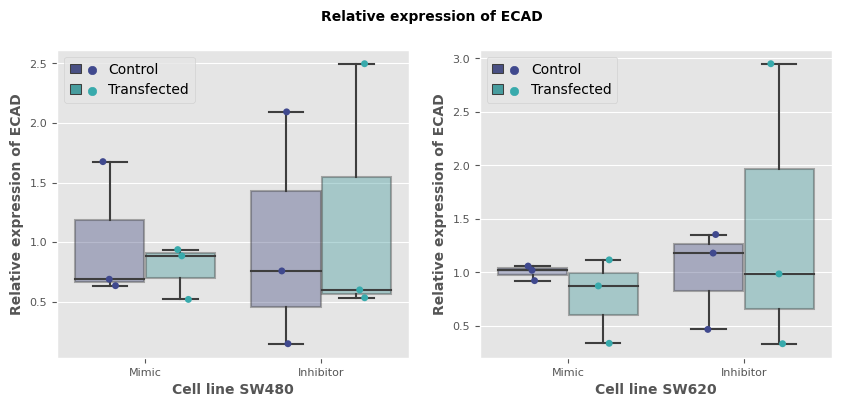

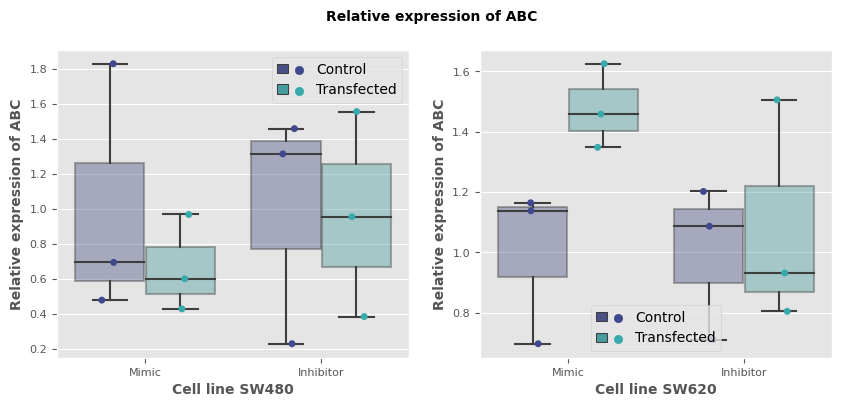

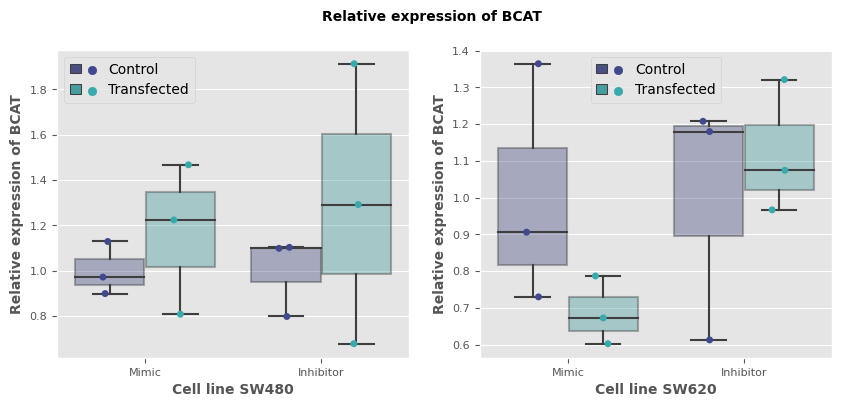

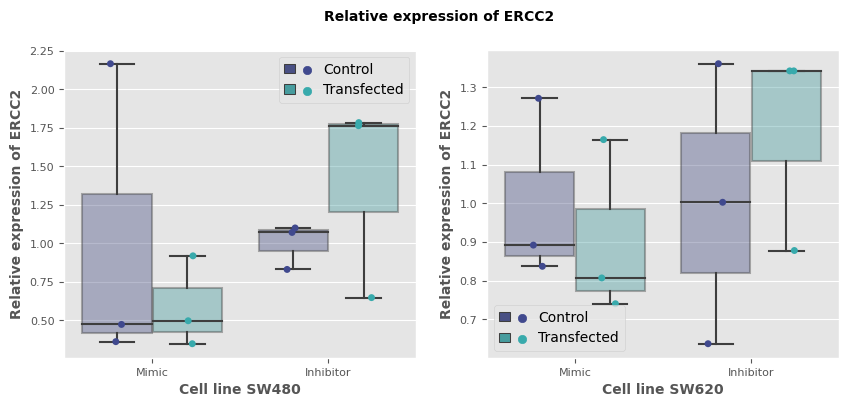

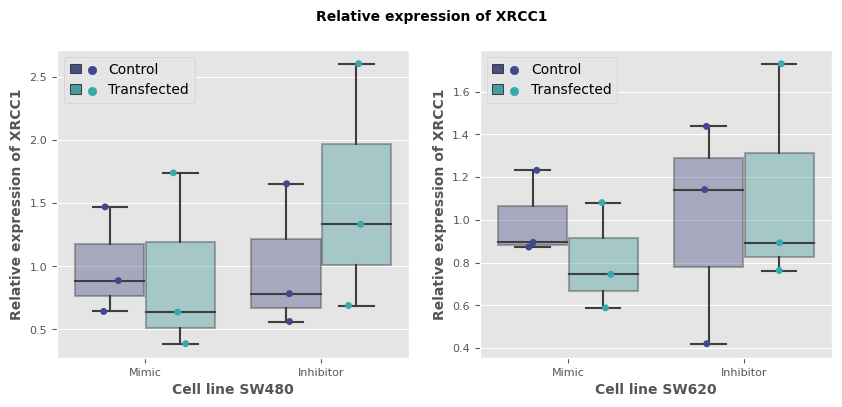

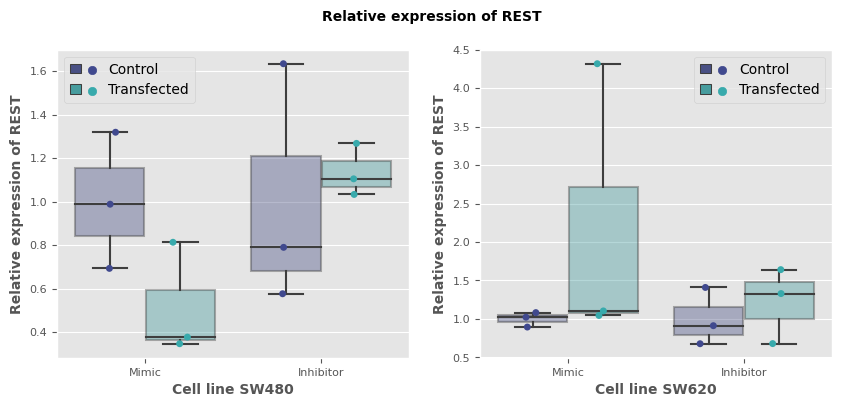

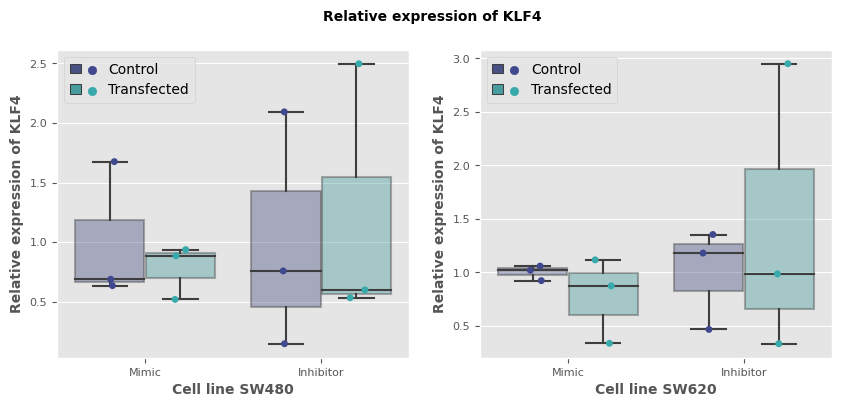

In [34]:
descriptive_graphs(df=df2, columns=protExp)

**Conclusions**


From the graphics, we can observe a great range of dispersion of results of protein quantification, which will most likely be challenging for further statistical analysis. 

### Normality Test

#### Normality test - Protein expression - SW480 cell line

Expression of: ECAD


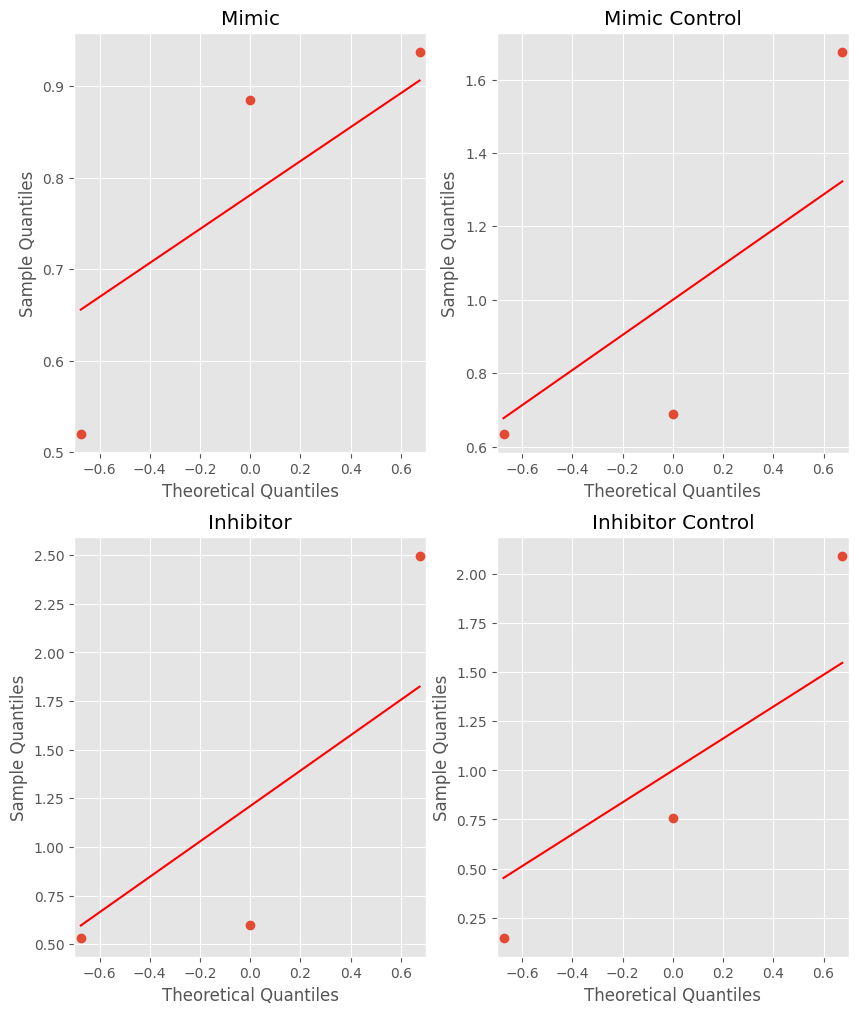

Expression of: ABC


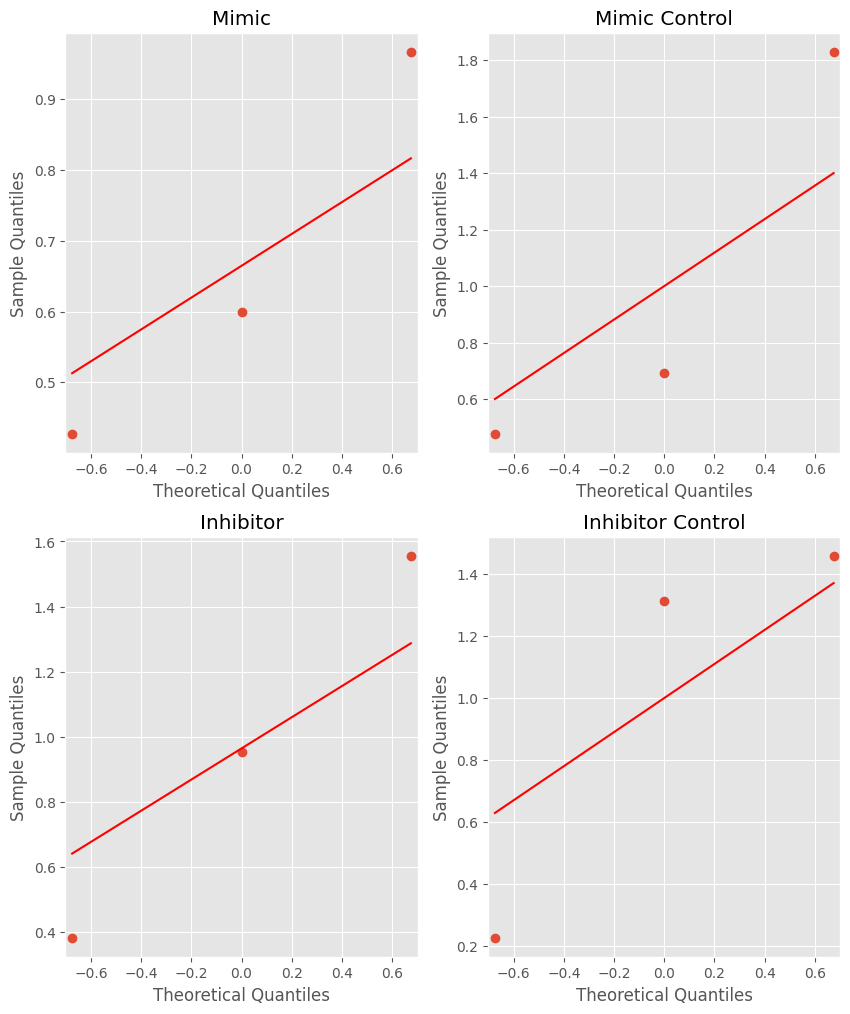

Expression of: BCAT


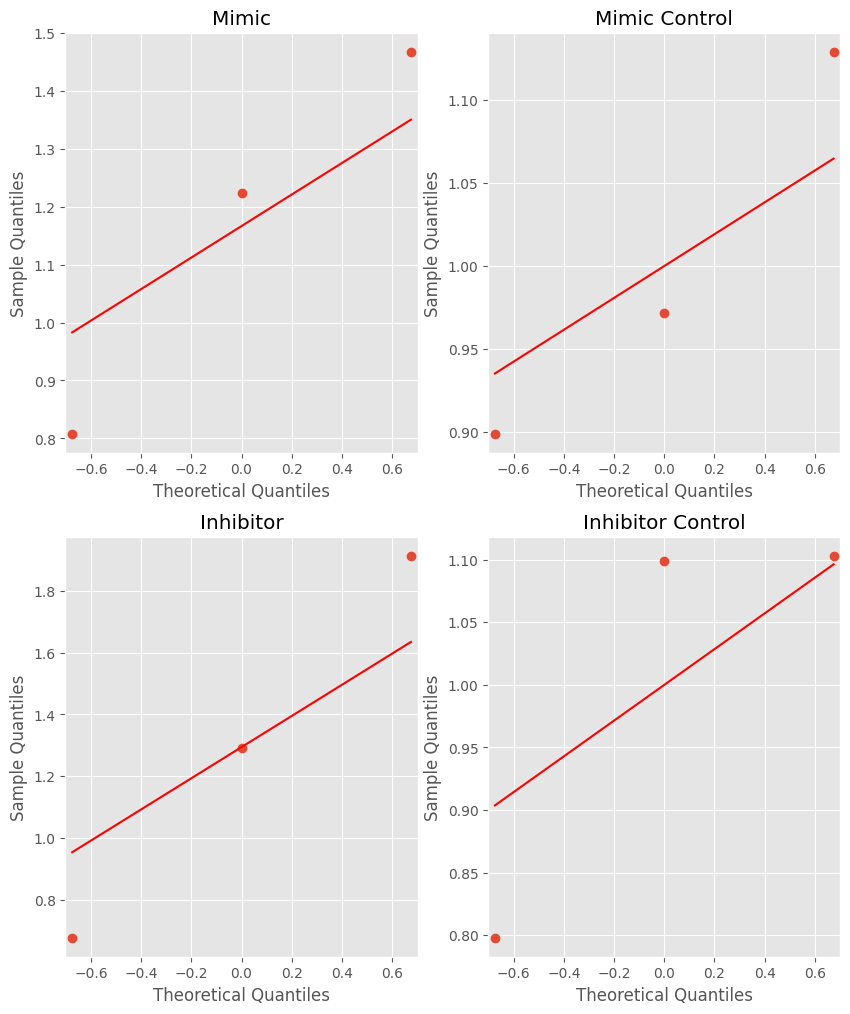

Expression of: ERCC2


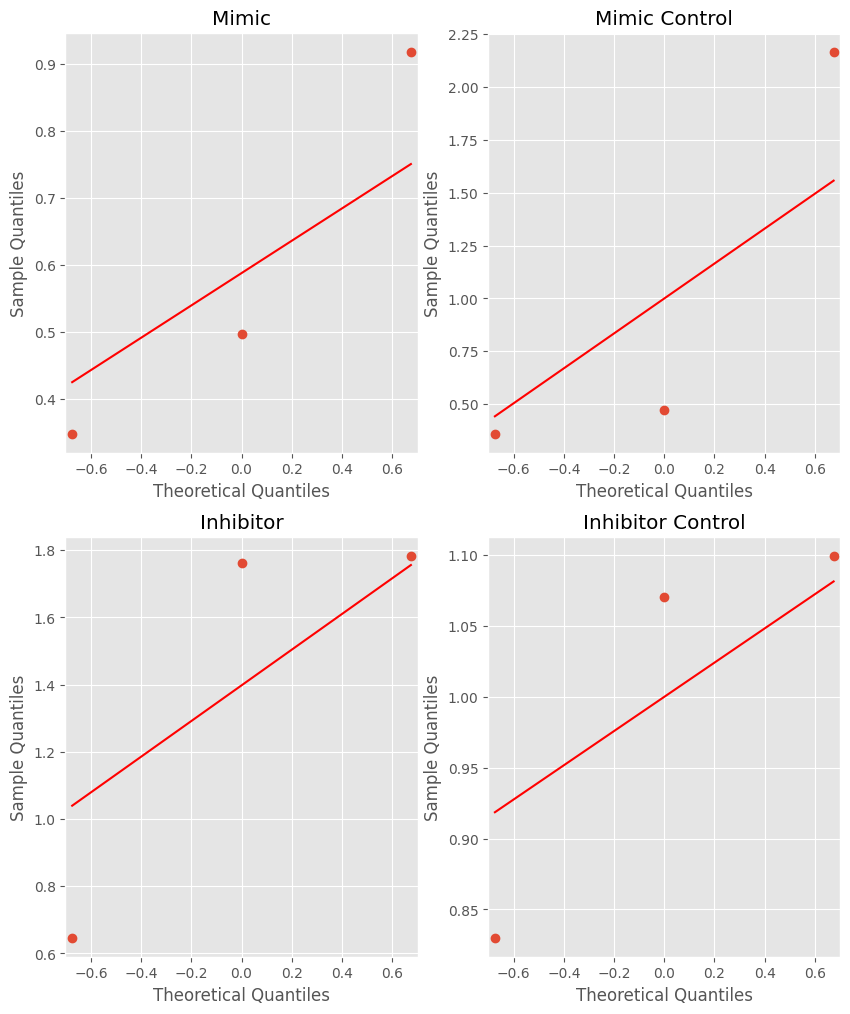

Expression of: XRCC1


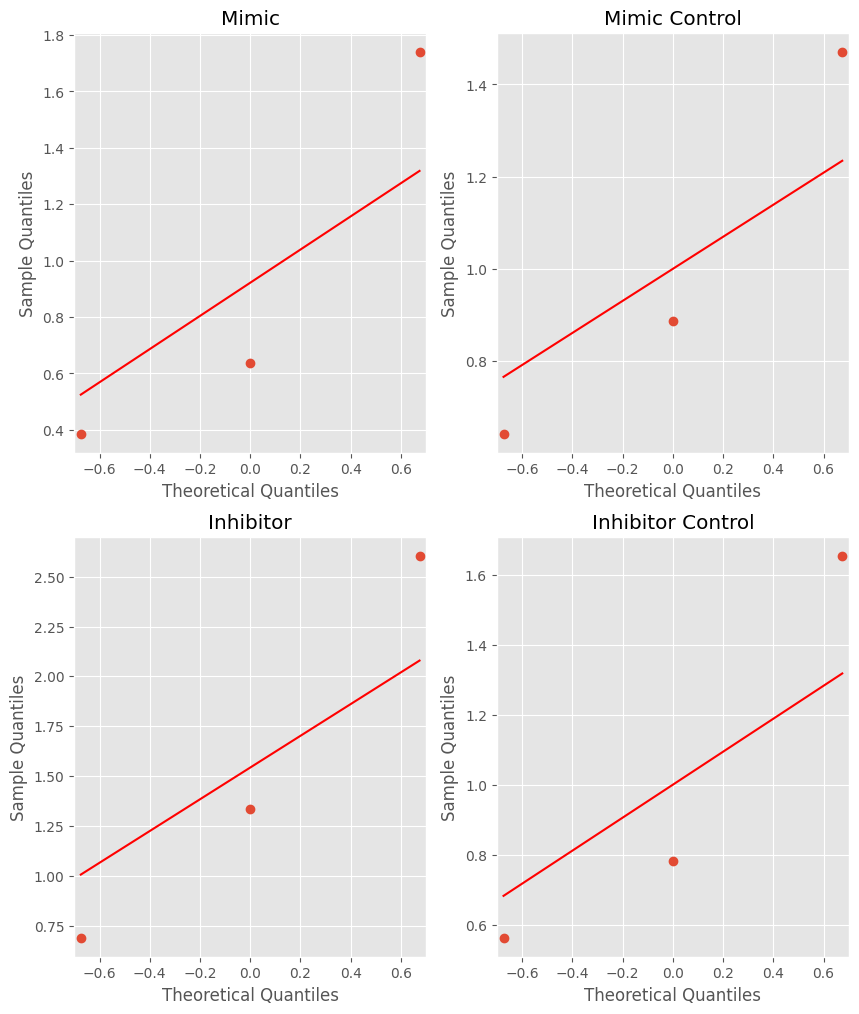

Expression of: REST


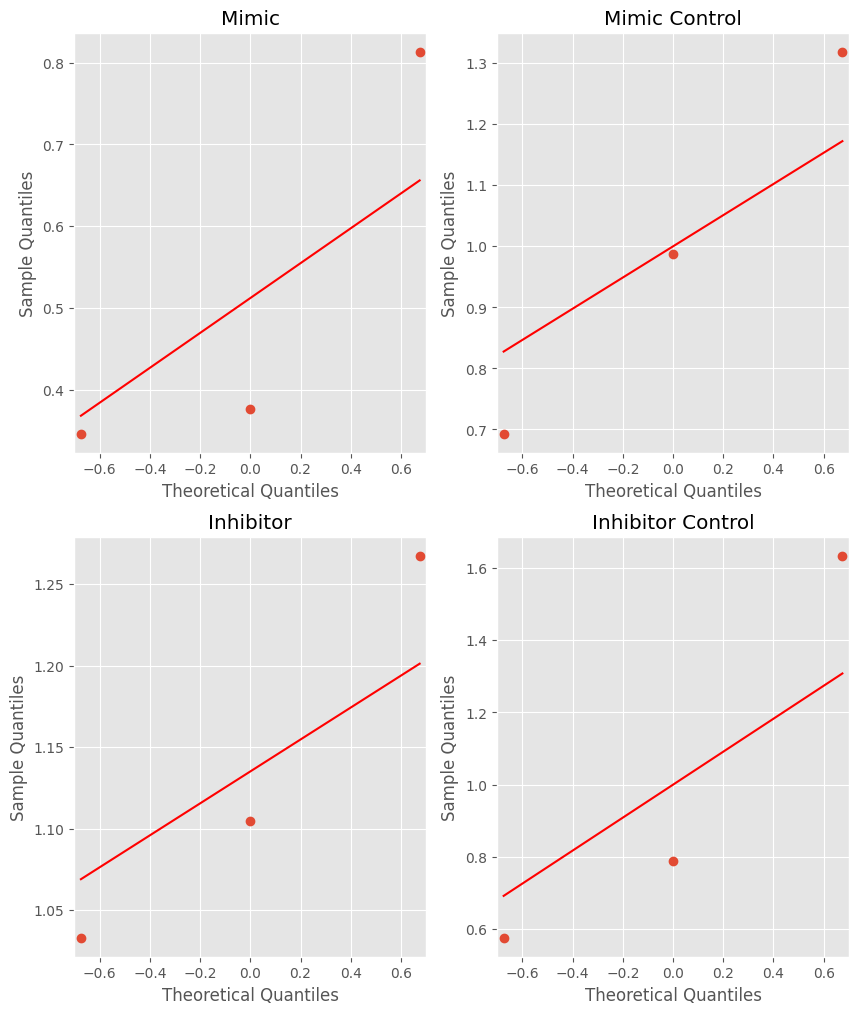

Expression of: KLF4


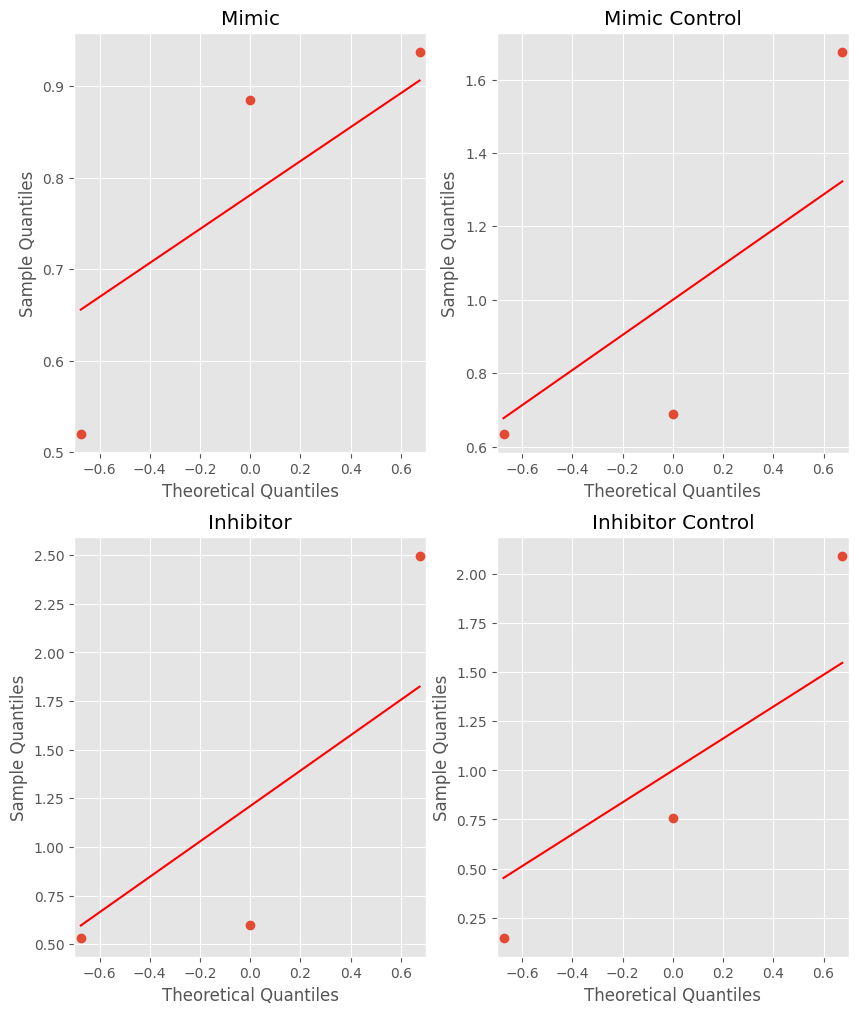

Expression of:  p_value mimic  p_value control mimic  p-value inhibitor  \
0           ECAD         0.2209                 0.0877             0.0566   
1            ABC         0.6062                 0.2844             0.9707   
2           BCAT         0.7130                 0.6018             0.9934   
3          ERCC2         0.4864                 0.1056             0.0297   
4          XRCC1         0.3344                 0.5561             0.6427   
5           REST         0.1111                 0.9370             0.5785   
6           KLF4         0.2209                 0.0877             0.0566   

   p-value control inhibitor           Pass Normality Test?  
0                     0.5959     Yes: Gaussian Distribution  
1                     0.2055     Yes: Gaussian Distribution  
2                     0.0231  No: Non-Gaussian Distribution  
3                     0.1883  No: Non-Gaussian Distribution  
4                     0.3668     Yes: Gaussian Distribution  
5                     0.3666     Yes: Gaussian Distribution  
6                     0.5959     Yes: Gaussian Distribution

In [35]:
normality_test(df=df2, columns=protExp, cell_line='SW480')

#### Normality test - Protein expression - SW620 cell line 

Expression of: ECAD


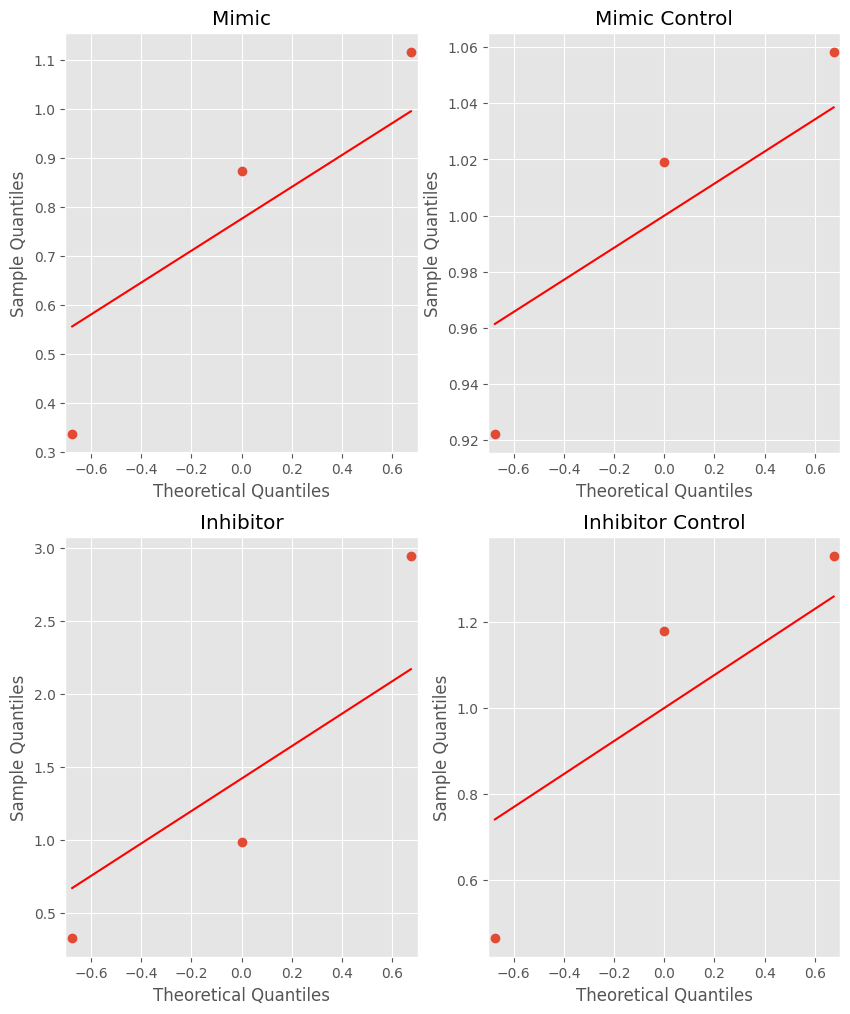

Expression of: ABC


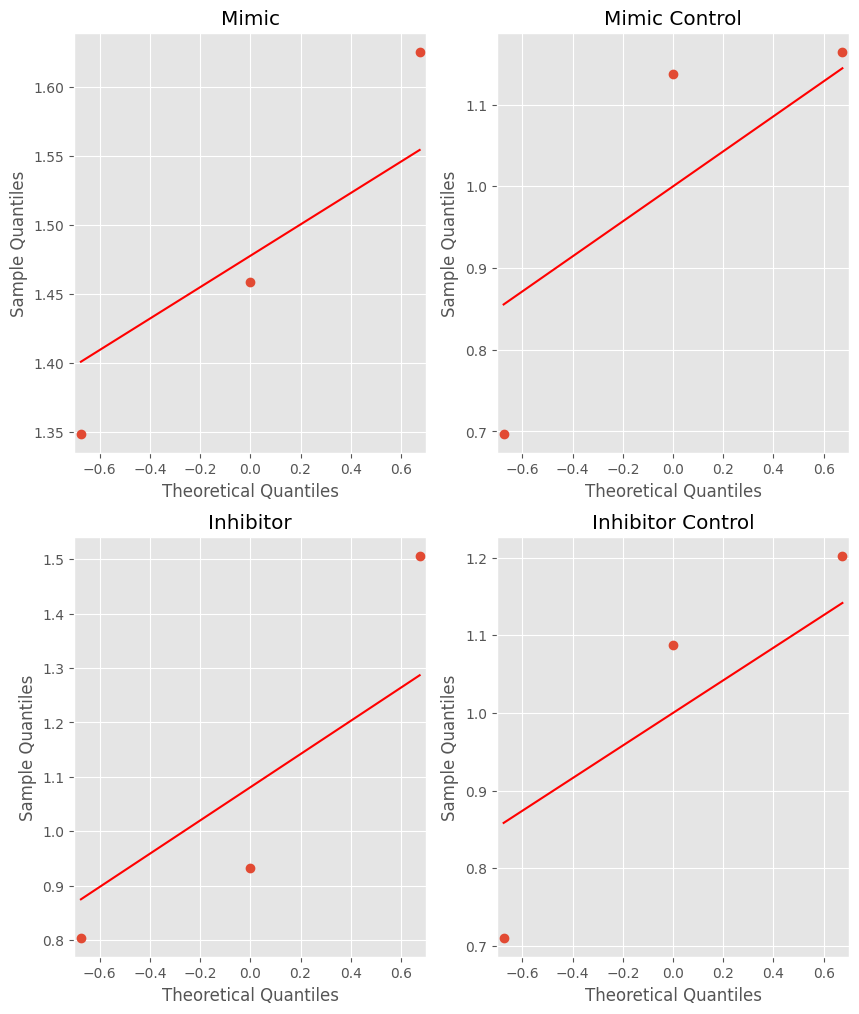

Expression of: BCAT


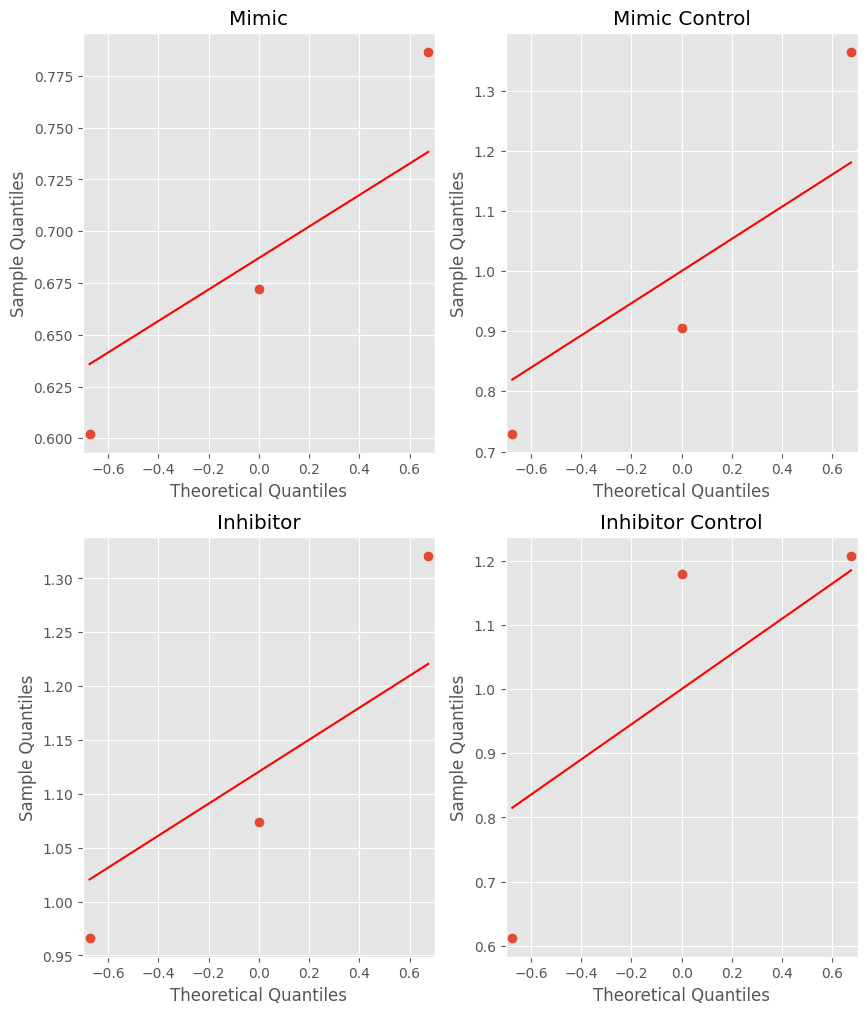

Expression of: ERCC2


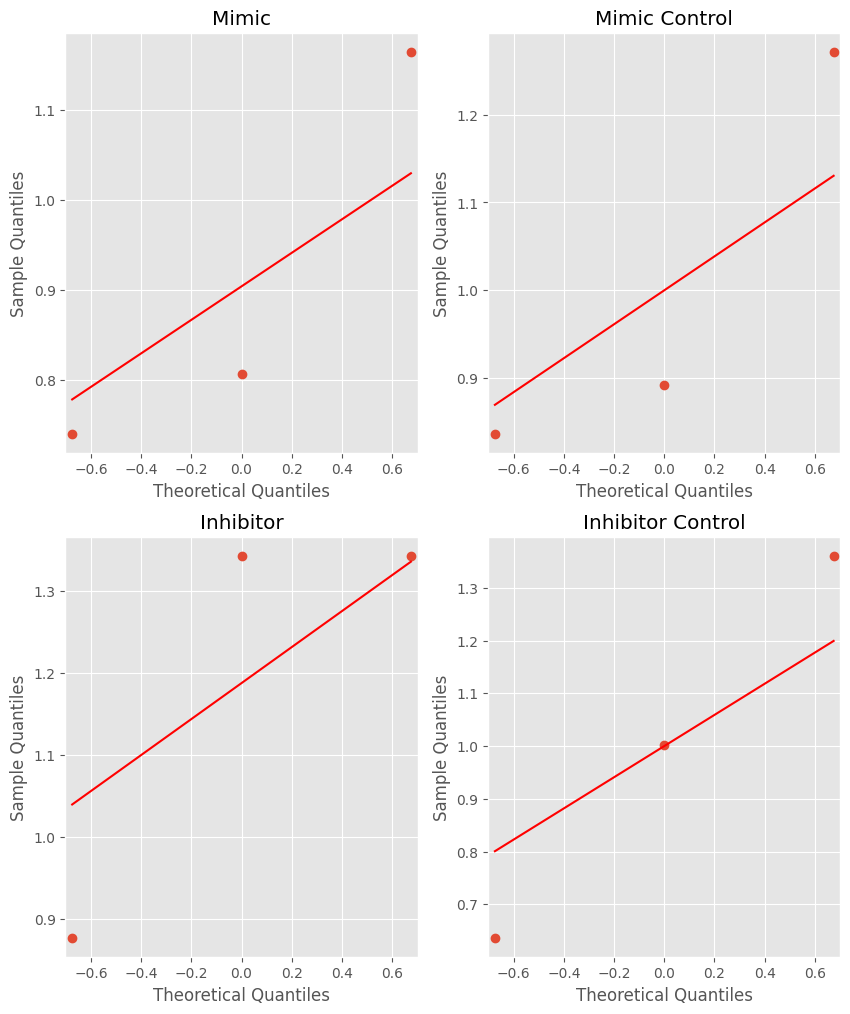

Expression of: XRCC1


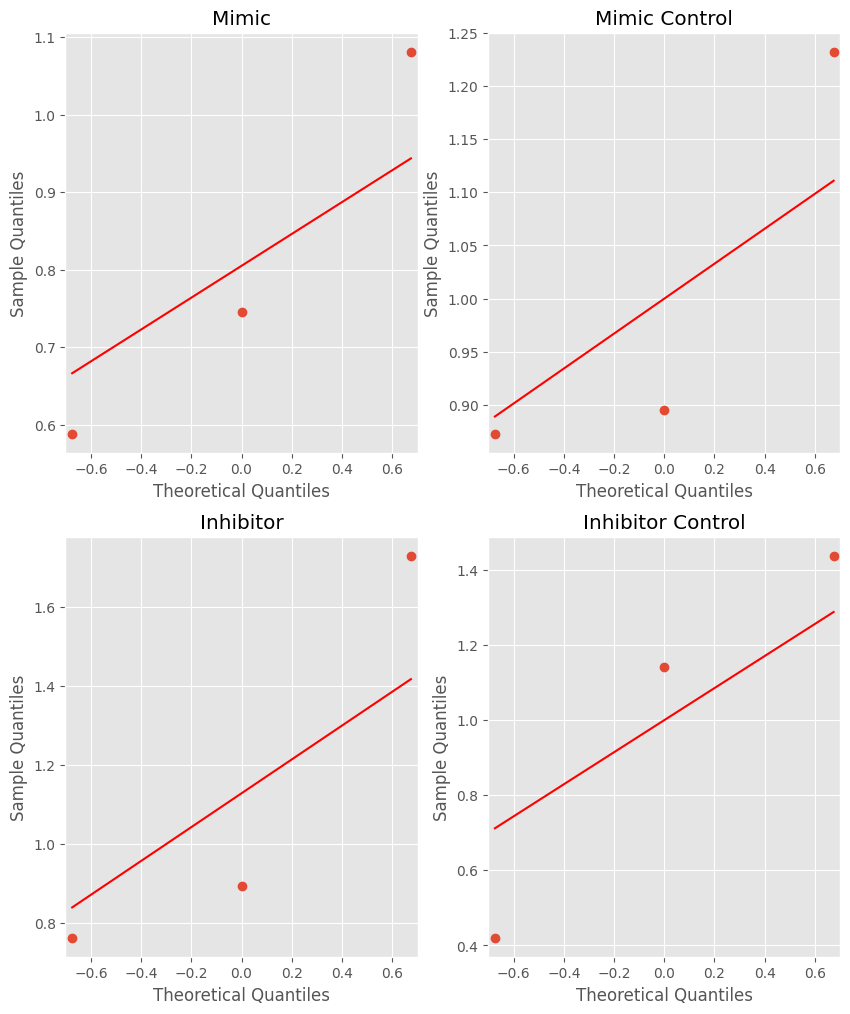

Expression of: REST


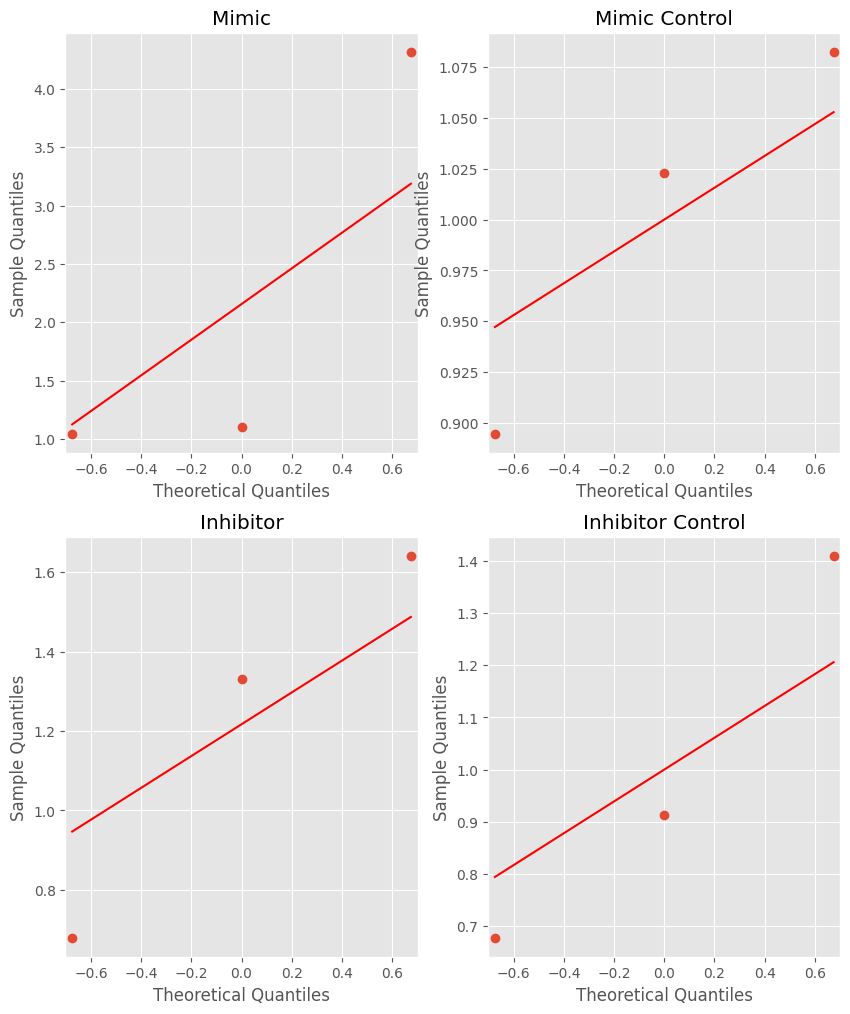

Expression of: KLF4


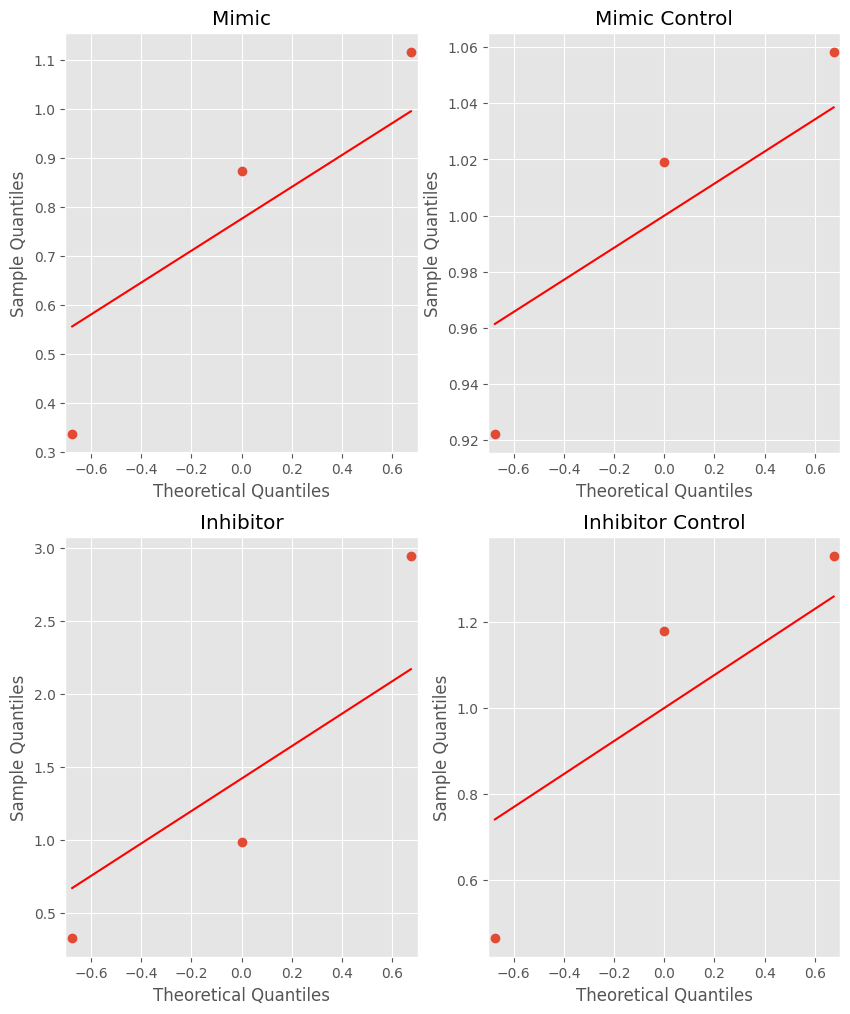

Expression of:  p_value mimic  p_value control mimic  p-value inhibitor  \
0           ECAD         0.5927                 0.5403             0.4620   
1            ABC         0.7738                 0.0972             0.3265   
2           BCAT         0.7370                 0.5199             0.5750   
3          ERCC2         0.2802                 0.2217             0.0000   
4          XRCC1         0.6055                 0.1034             0.2367   
5           REST         0.0301                 0.6047             0.6160   
6           KLF4         0.5927                 0.5403             0.4620   

   p-value control inhibitor           Pass Normality Test?  
0                     0.3546     Yes: Gaussian Distribution  
1                     0.4320     Yes: Gaussian Distribution  
2                     0.0797     Yes: Gaussian Distribution  
3                     0.9886  No: Non-Gaussian Distribution  
4                     0.5481     Yes: Gaussian Distribution  
5                     0.6095  No: Non-Gaussian Distribution  
6                     0.3546     Yes: Gaussian Distribution

In [36]:
normality_test(df=df2, columns=protExp, cell_line='SW620')

**Conclusions**


From the graphics and Shapiro-Wilk test results, we determine that, although not all data points align with the normality line in the Q-Q plots, there is not enough evidence to confirm that the results do not align with Gaussian distribution (p-value > 0.05).

Non-normal distribution is confirmed, and therefore, non-parametric tests must be performed for the following genes:

- SW480: BCAT and ERCC2.
- SW620: ERCC2 and REST.

### Levene's test for equality of Variances

#### Levene's test - Protein expression - SW480 cell line

In [37]:
levene_test(df=df2, columns=protExp, cell_line='SW480')

Expression of:  p-value       Pass Levene test
0           ECAD  0.766403  Yes: Equal variances
1            ABC  0.890207  Yes: Equal variances
2           BCAT  0.323510  Yes: Equal variances
3          ERCC2  0.726736  Yes: Equal variances
4          XRCC1  0.838881  Yes: Equal variances
5           REST  0.661740  Yes: Equal variances
6           KLF4  0.766403  Yes: Equal variances

#### Levene's test - Protein expression - SW620 cell line

In [38]:
levene_test(df=df2, columns=protExp, cell_line='SW620')

Expression of:  p-value       Pass Levene test
0           ECAD  0.358351  Yes: Equal variances
1            ABC  0.890412  Yes: Equal variances
2           BCAT  0.795140  Yes: Equal variances
3          ERCC2  0.933464  Yes: Equal variances
4          XRCC1  0.777488  Yes: Equal variances
5           REST  0.579884  Yes: Equal variances
6           KLF4  0.358351  Yes: Equal variances

**Conclusions**


From the results of Levene's test, we can confirm equal variances between result groups for all genes, which is required for direct statistical tests such as the T-Test, ANOVA, and non-parametric variants. 

### Student T-Test and Kruskal-Wallis H-Test for median comparison between two groups

#### Mean Comparison - Protein expression - SW480 cell line

In [39]:
two_groups_test(df=df2, columns=protExp, cell_line='SW480')

Expression of:  p_value mimic vs. ctrl stat mimic vs. ctrl  \
0           ECAD                 0.57866     non-significant   
1            ABC                 0.49625     non-significant   
2           BCAT                 0.51269     non-significant   
3          ERCC2                 0.82726     non-significant   
4          XRCC1                 0.87905     non-significant   
5           REST                 0.10689     non-significant   
6           KLF4                 0.57866     non-significant   

   p_value inhibitor vs. ctrl stat inhibitor vs. ctrl  p-value crtl vs. ctrl  \
0                     0.81942         non-significant                1.00000   
1                     0.94832         non-significant                1.00000   
2                     0.51269         non-significant                0.82726   
3                     0.51269         non-significant                0.51269   
4                     0.45355         non-significant                1.00000   
5                     0.70338         non-significant                1.00000   
6                     0.81942         non-significant                1.00000   

  stat crtl vs. ctrl                           Test Type  
0    non-significant                   Parametric T-Test  
1    non-significant                   Parametric T-Test  
2    non-significant  Non-Parametric Kruskal-Wallis Test  
3    non-significant  Non-Parametric Kruskal-Wallis Test  
4    non-significant                   Parametric T-Test  
5    non-significant                   Parametric T-Test  
6    non-significant                   Parametric T-Test

#### Mean Comparison - Protein expression - SW620 cell line

In [40]:
two_groups_test(df=df2, columns=protExp, cell_line='SW620')

Expression of:  p_value mimic vs. ctrl     stat mimic vs. ctrl  \
0           ECAD                 0.39114         non-significant   
1            ABC                 0.04965  Significant Difference   
2           BCAT                 0.18669         non-significant   
3          ERCC2                 0.27523         non-significant   
4          XRCC1                 0.35361         non-significant   
5           REST                 0.12663         non-significant   
6           KLF4                 0.39114         non-significant   

   p_value inhibitor vs. ctrl stat inhibitor vs. ctrl  p-value crtl vs. ctrl  \
0                     0.63823         non-significant                1.00000   
1                     0.77286         non-significant                1.00000   
2                     0.61328         non-significant                1.00000   
3                     0.82478         non-significant                0.82726   
4                     0.77810         non-significant                1.00000   
5                     0.51269         non-significant                0.82726   
6                     0.63823         non-significant                1.00000   

  stat crtl vs. ctrl                           Test Type  
0    non-significant                   Parametric T-Test  
1    non-significant                   Parametric T-Test  
2    non-significant                   Parametric T-Test  
3    non-significant  Non-Parametric Kruskal-Wallis Test  
4    non-significant                   Parametric T-Test  
5    non-significant  Non-Parametric Kruskal-Wallis Test  
6    non-significant                   Parametric T-Test

**Conclusions**


We observe non-significant differences between tested and control groups for most of our result groups.

Statistical difference is confirmed (p-value <0.05) for the following result 

- SW620:
    - ABC: Mimic vs Control. 

Mean comparisons between both controls are assessed to evaluate potential anomalies in protein expression caused by off-target effects of non-specific oligonucleotides.

### ANOVA and Kruskal-Wallis H-Test for median comparison between four groups

#### Mean comparison of multiple groups - Protein expression - SW480 cell line

In [41]:
multiple_groups_test(df=df2, columns=protExp, cell_line='SW480')

Expression of:        F  p_value      Stat Result  \
0           ECAD  0.14031  0.93303  non-significant   
1            ABC  0.22677  0.87521  non-significant   
2           BCAT  1.30769  0.72731  non-significant   
3          ERCC2  3.00000  0.39163  non-significant   
4          XRCC1  0.49717  0.69439  non-significant   
5           REST  1.82511  0.22063  non-significant   
6           KLF4  0.14031  0.93303  non-significant   

                              Test Type  
0              Parametric One-Way ANOVA  
1              Parametric One-Way ANOVA  
2  Non-Parametric Kruskal-Wallis H-Test  
3  Non-Parametric Kruskal-Wallis H-Test  
4              Parametric One-Way ANOVA  
5              Parametric One-Way ANOVA  
6              Parametric One-Way ANOVA

#### Mean comparison of multiple groups - Protein expression - SW620 cell line

In [42]:
multiple_groups_test(df=df2, columns=protExp, cell_line='SW620')

Expression of:        F  p_value      Stat Result  \
0           ECAD  0.39146  0.76258  non-significant   
1            ABC  2.13186  0.17438  non-significant   
2           BCAT  1.57777  0.26908  non-significant   
3          ERCC2  2.18713  0.53449  non-significant   
4          XRCC1  0.32819  0.80532  non-significant   
5           REST  2.28205  0.51597  non-significant   
6           KLF4  0.39146  0.76258  non-significant   

                              Test Type  
0              Parametric One-Way ANOVA  
1              Parametric One-Way ANOVA  
2              Parametric One-Way ANOVA  
3  Non-Parametric Kruskal-Wallis H-Test  
4              Parametric One-Way ANOVA  
5  Non-Parametric Kruskal-Wallis H-Test  
6              Parametric One-Way ANOVA

**Conclusions**


We observe that all proteins show non-significant differences between transfection groups.

## Checking for statistical power of tests (protein expression)

### Statistical power - Protein expression - SW480 cell line

In [43]:
power_test(df=df2, columns=protExp, cell_line='SW480')

Expression of:  Power TTest mimic vs. ctrl  Req. Sample Size mimic vs. ctrl  \
0           ECAD                     0.08925                            44.07   
1            ABC                     0.11046                            29.08   
2           BCAT                     0.12221                            24.56   
3          ERCC2                     0.09960                            35.15   
4          XRCC1                     0.05280                           598.01   
5           REST                     0.48846                             4.83   
6           KLF4                     0.08925                            44.07   

   Power TTest inhibitor vs. ctrl  Req. Sample Size inhibitor vs. ctrl  \
0                         0.05634                               265.17   
1                         0.05051                              3300.86   
2                         0.11832                                25.88   
3                         0.16626                                15.72   
4                         0.12456                                23.82   
5                         0.06794                                94.73   
6                         0.05634                               265.17   

   Power ANOVA  Req. Sample Size ANOVA  
0     0.059123                  400.61  
1     0.074510                  154.57  
2     0.160253                   39.69  
3     0.466431                   13.23  
4     0.183249                   33.79  
5     0.989674                    5.16  
6     0.059123                  400.61

### Statistical power - Protein expression - SW620 cell line

In [44]:
power_test(df=df2, columns=protExp, cell_line='SW620')

Expression of:  Power TTest mimic vs. ctrl  Req. Sample Size mimic vs. ctrl  \
0           ECAD                     0.15033                            18.02   
1            ABC                     0.72379                             3.32   
2           BCAT                     0.32240                             7.29   
3          ERCC2                     0.07758                            62.11   
4          XRCC1                     0.16966                            15.30   
5           REST                     0.17412                            14.79   
6           KLF4                     0.15033                            18.02   

   Power TTest inhibitor vs. ctrl  Req. Sample Size inhibitor vs. ctrl  \
0                         0.07771                                61.82   
1                         0.06019                               165.55   
2                         0.08221                                53.39   
3                         0.10611                                31.23   
4                         0.05971                               173.73   
5                         0.09000                                43.26   
6                         0.07771                                61.82   

   Power ANOVA  Req. Sample Size ANOVA  
0     0.128620                   53.21  
1     0.998885                    4.63  
2     0.956443                    5.85  
3     0.212657                   28.59  
4     0.103626                   74.84  
5     0.555113                   11.24  
6     0.128620                   53.21

**Conclusions**


We confirm that our results lack sufficient statistical power (ideal >0.8) to discard false negatives in most of our results, at least for parametric tests T-Test and ANOVA. This is most likely due to the small sample size of our experiments.

Statistical power requirements fulfilled (power >0.8) for the following results: 

- SW480:
    - REST: ANOVA
- SW620:
    - ABC: ANOVA
    - BCAT: ANOVA